# Análisis de la población mayor en España

Importamos bibliotecas necesarias:  
- pandas: para realizar los análisis de las bases de datos
- numpy: para trabajar con matrices
- matplotlib.pyplot: para trabajar con gráficas

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Importamos la base de datos proveniente de la INE:

In [62]:
dataFramePobEdad = pd.read_csv('PobEdad2.csv', delimiter = ';') 

Creamos otro dataframe que disponga sólamente de los datos de 2022:

In [65]:
dataFramePobEdad2022 = dataFramePobEdad[(dataFramePobEdad['Provincias'] == 'Total Nacional') & (dataFramePobEdad['Periodo'] == 2022)]

Creamos una función para formatear la columna "Total":

In [66]:
def pasarFloat(x):
    if ',' in x:
        a = x.split(',')
        ent = a[0]
        frac = a[1]
        
        return float(ent+'.'+frac)

    return float(x)


Aplicamos pasarFloat a la columna "Total", creando la columna "Porcentjaes":

In [78]:
dataFramePobEdad['Porcentaje'] = dataFramePobEdad['Total'].map(pasarFloat)

Realizamos la gráfica correspondiente:

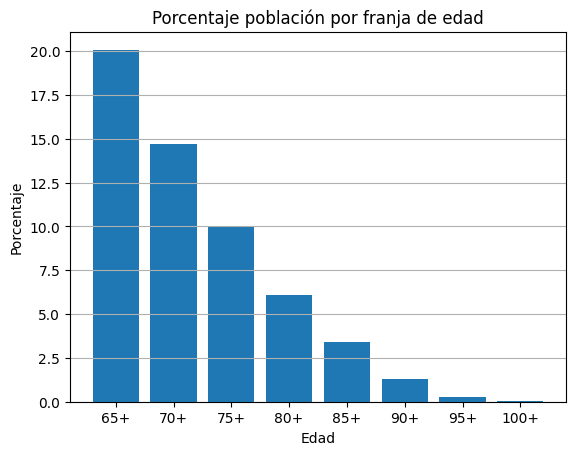

In [80]:
xticks = ['65+','70+','75+','80+','85+','90+','95+','100+']

fig, ax = plt.subplots()

ax.bar(xticks, dataFramePobEdad2022['Porcentaje'])
ax.set_title('Porcentaje población por franja de edad')
ax.grid(axis='y')
ax.set_xlabel('Edad')
ax.set_ylabel('Porcentaje')

None

Creamos otro dataframe con los datos de sólamente 65 años y más:

In [121]:
dataFramePobEdad_65mas = dataFramePobEdad[(dataFramePobEdad['Edad'] == '65 y más años')]

Cremos la gráfico correspondiente con el dataframe anterior:

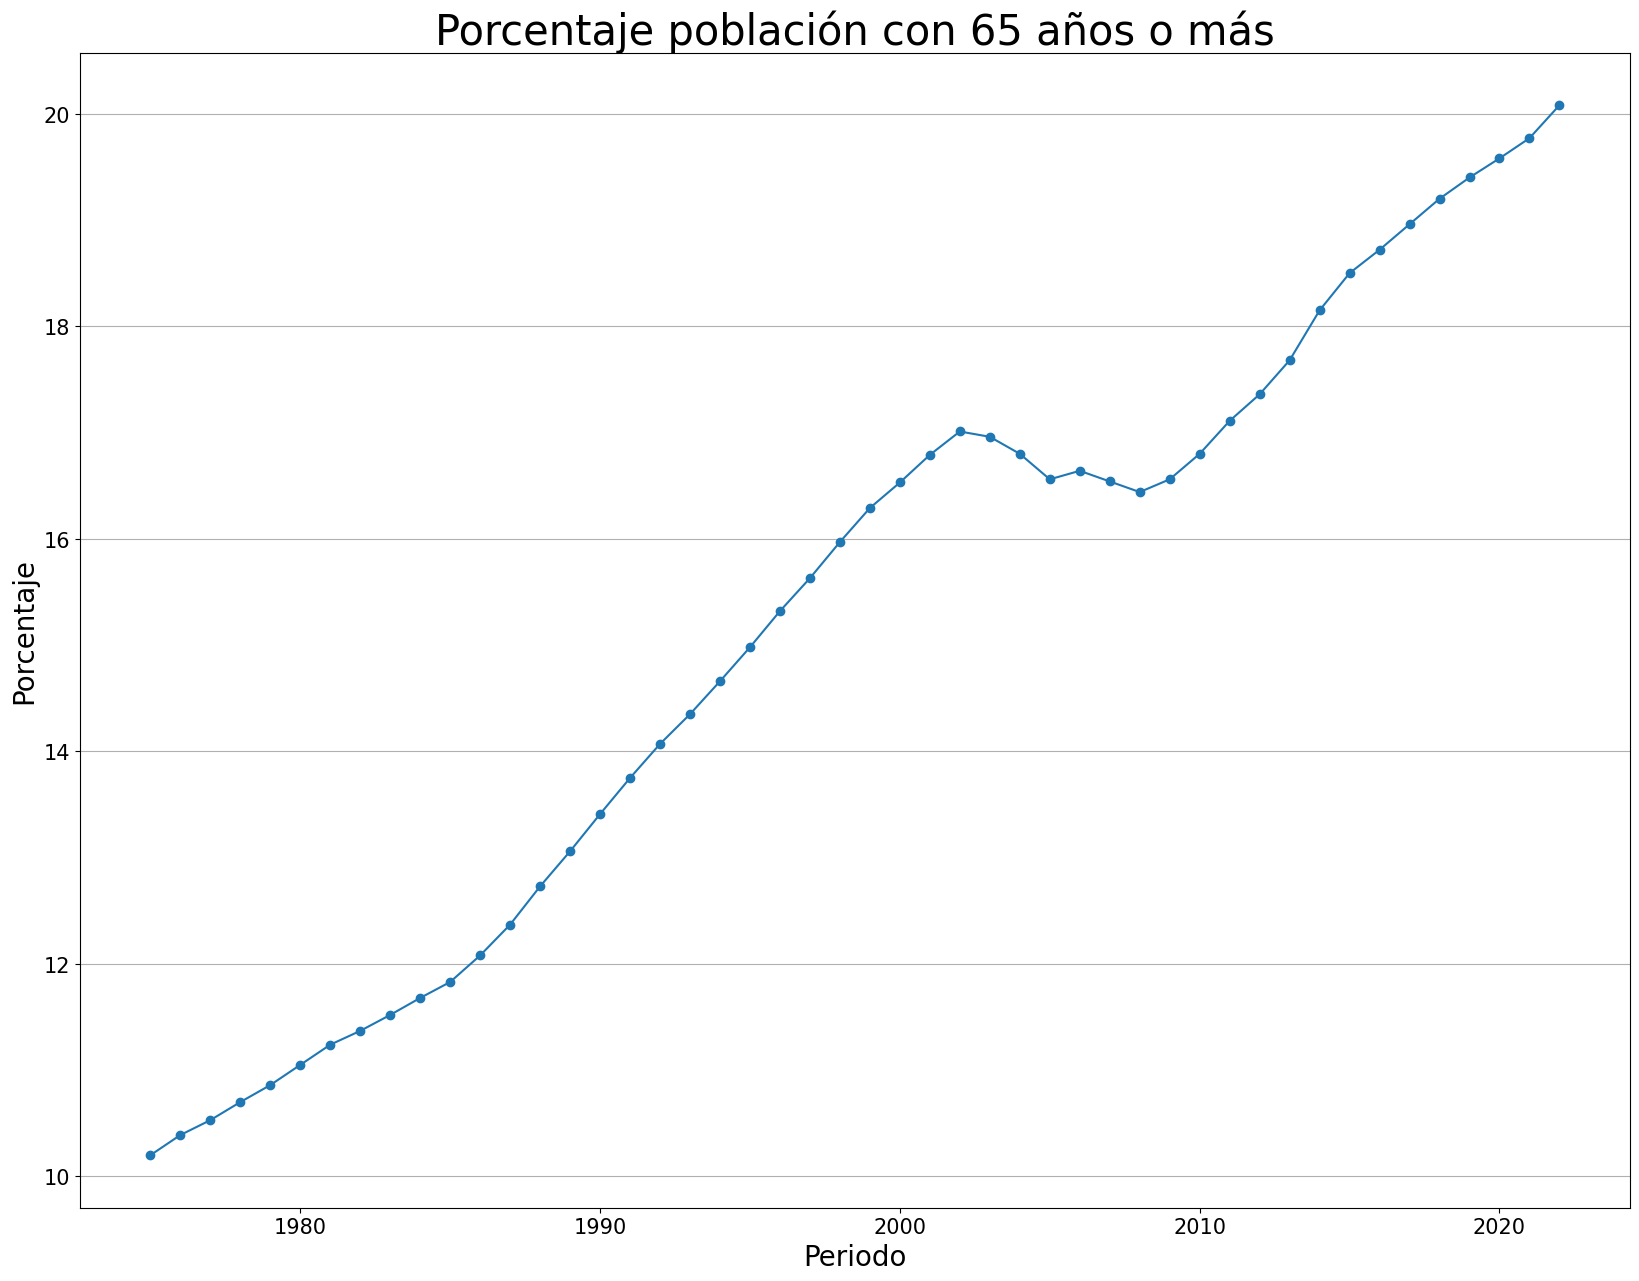

In [119]:
dataFramePobEdad_65mas_nacional = dataFramePobEdad[(dataFramePobEdad['Edad'] == '65 y más años') & (dataFramePobEdad['Provincias'] == 'Total Nacional')]

fig, ax = plt.subplots(figsize = (20,15))
ax.plot(dataFramePobEdad_65mas_nacional['Periodo'],dataFramePobEdad_65mas_nacional['Porcentaje'],marker='o')
ax.set_title('Porcentaje población con 65 años o más',fontsize=30)
ax.set_ylabel('Porcentaje',fontsize=20)
ax.set_xlabel('Periodo',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
ax.grid(axis='y')

None

Creamos un datadframe con aquellos datos de 65 años y más, y del año 2022:

In [123]:
dataFramePobEdad_65mas_2022 = dataFramePobEdad_65mas[dataFramePobEdad_65mas['Periodo'] == 2022]

Creamos múltiples gráficas de cada provincia:

/var/folders/5m/97f5rgmd5wbgwjh5x8fgc6jw0000gn/T/ipykernel_29596/1396317269.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  seleccion = dataFramePobEdad_65mas[dataFramePobEdad['Provincias'] == prov]
/var/folders/5m/97f5rgmd5wbgwjh5x8fgc6jw0000gn/T/ipykernel_29596/1396317269.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(15,10))


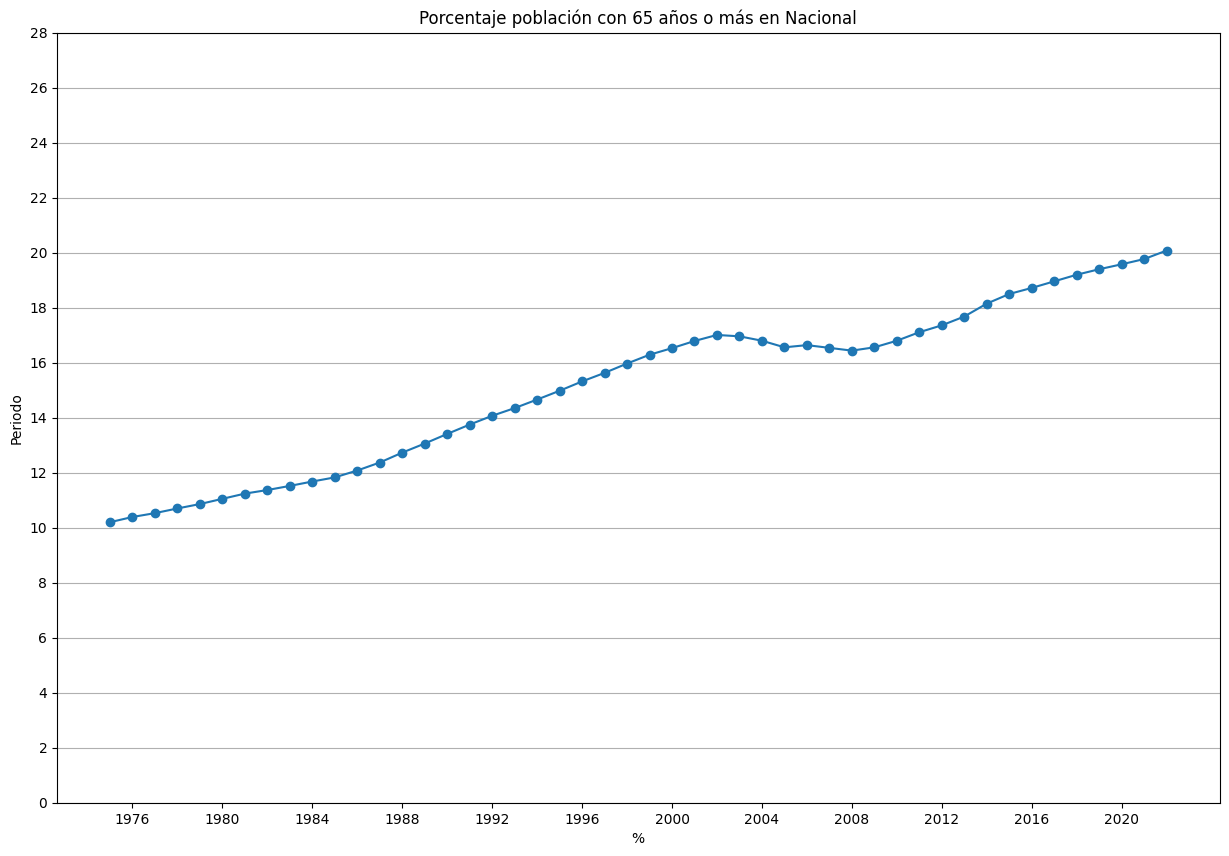

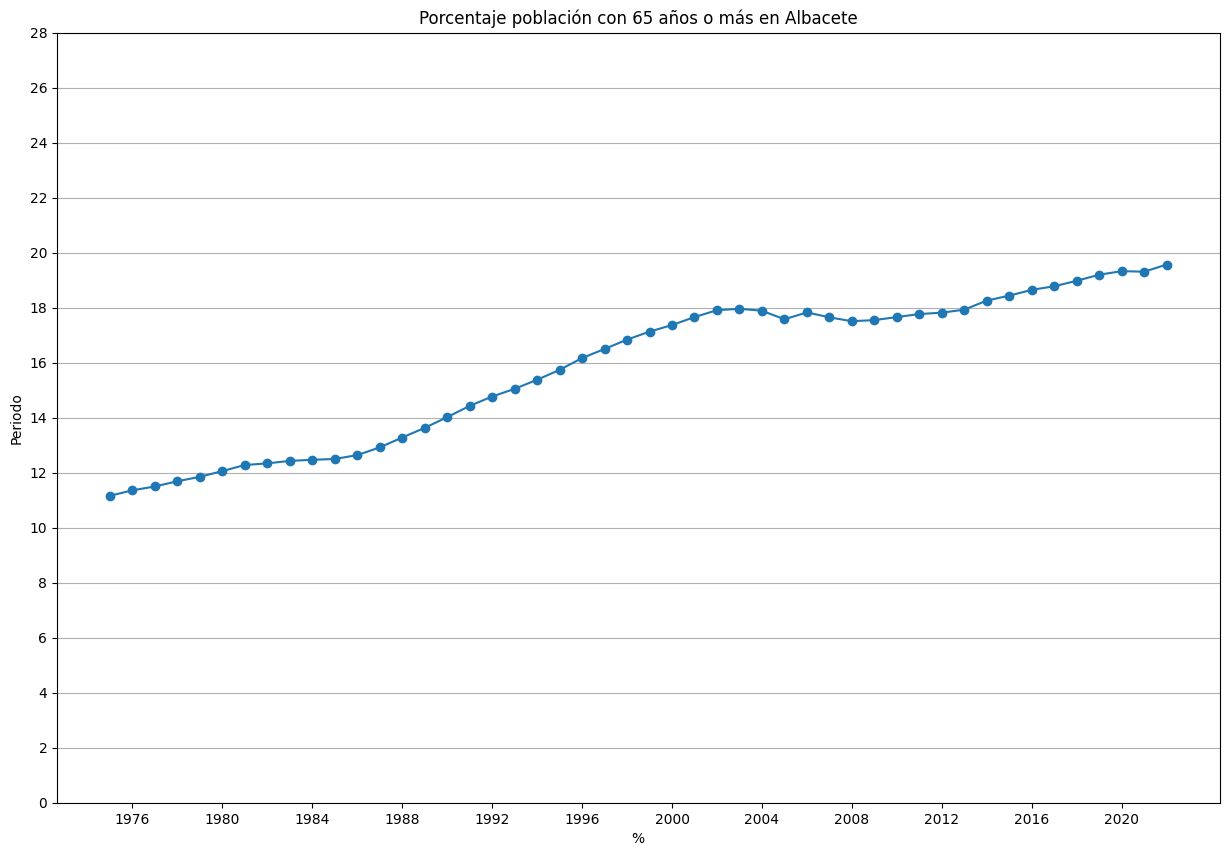

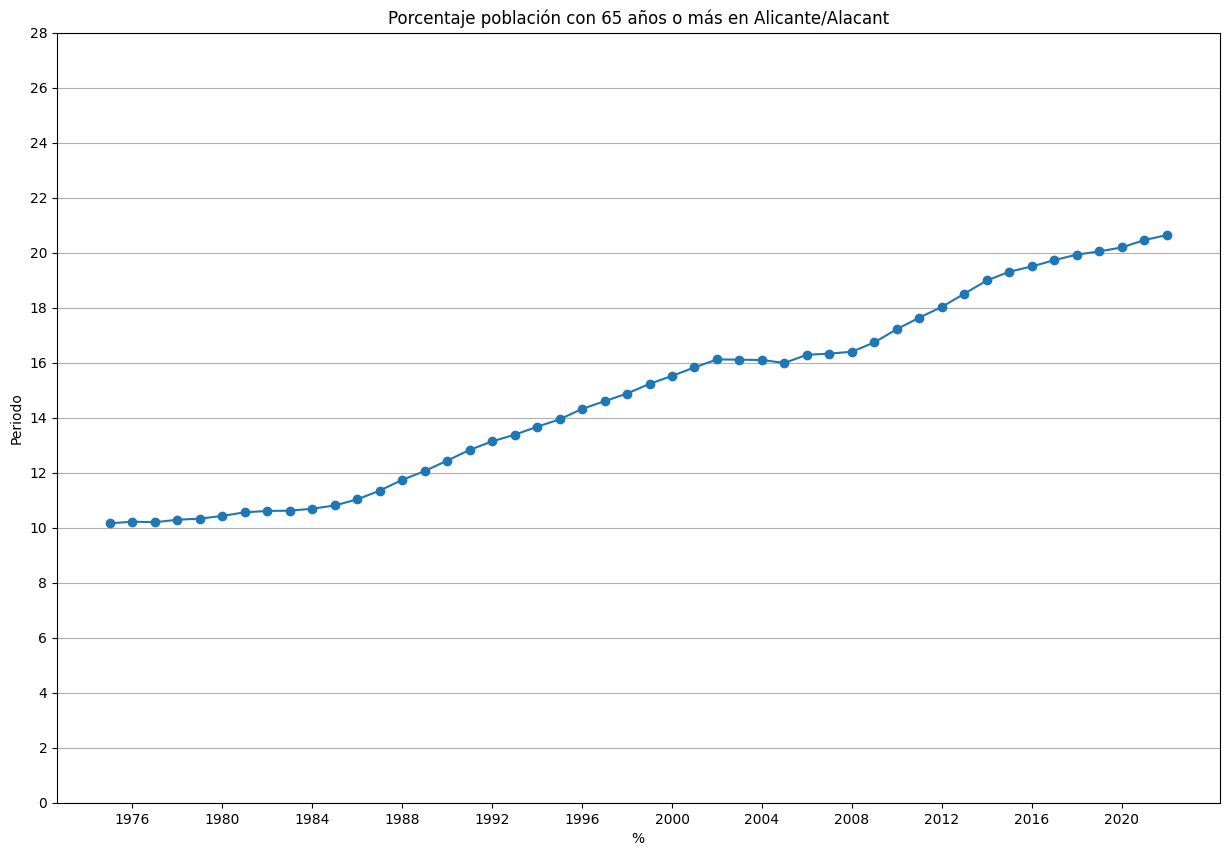

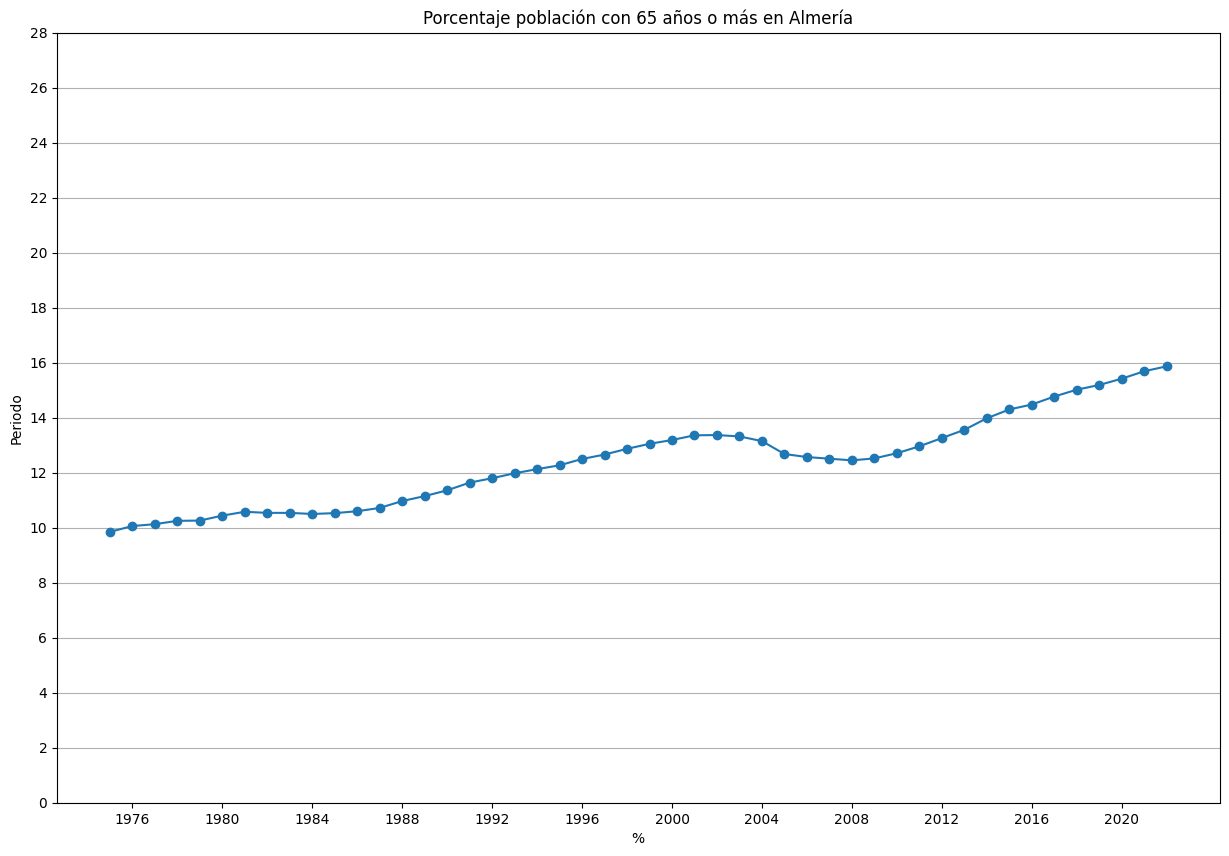

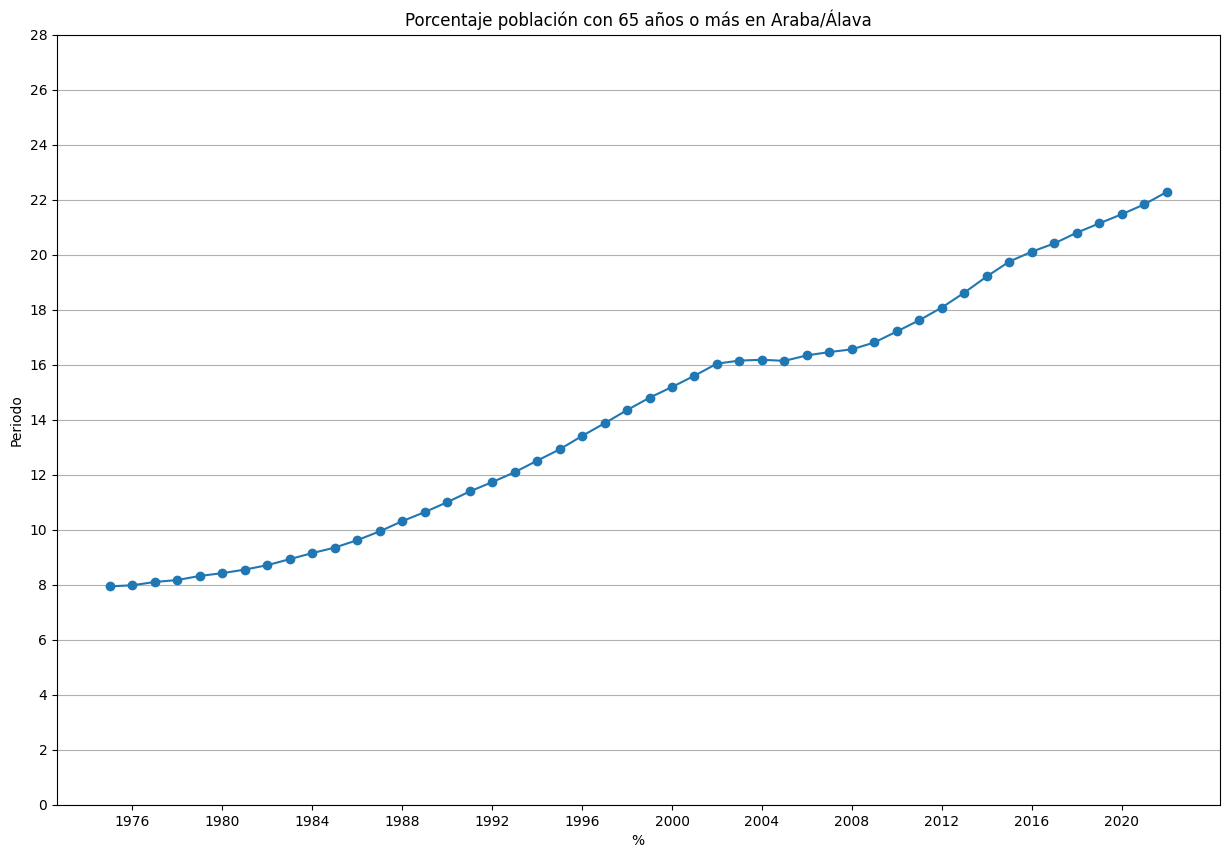

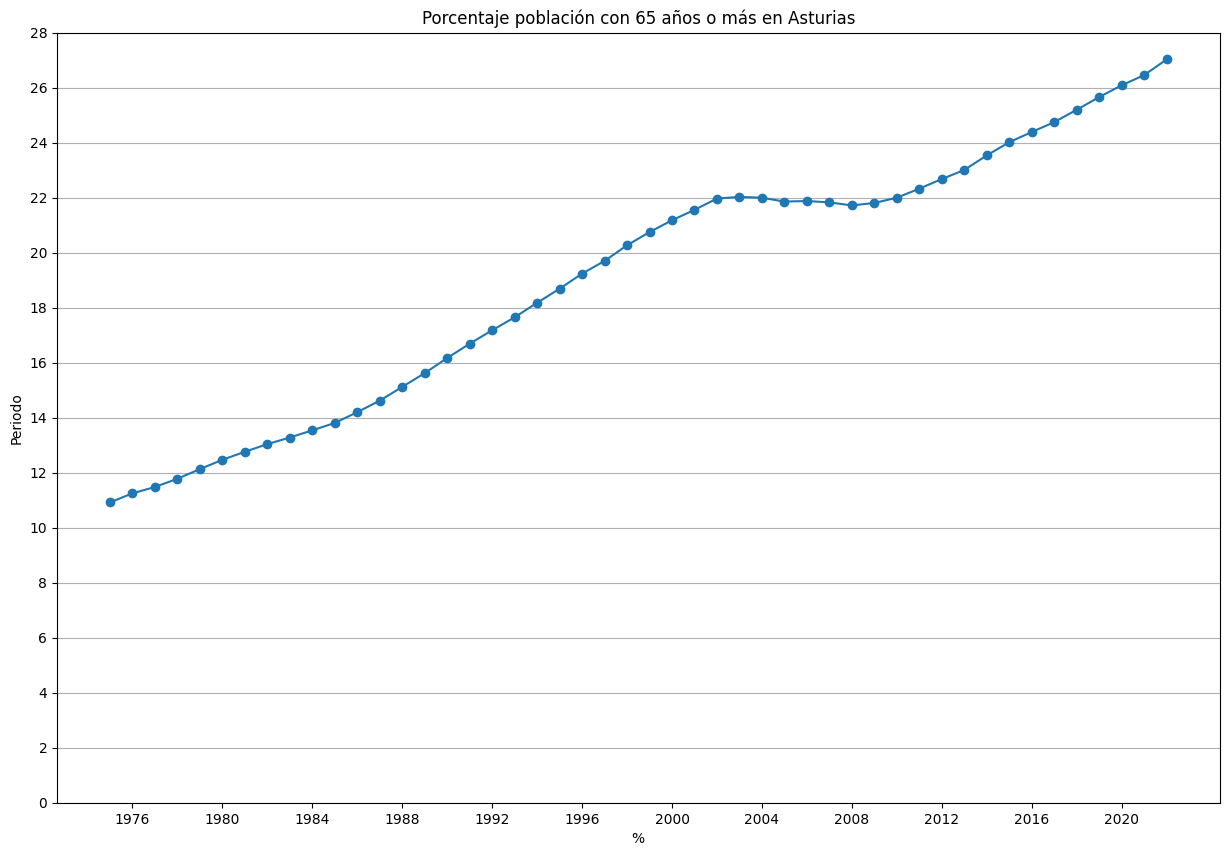

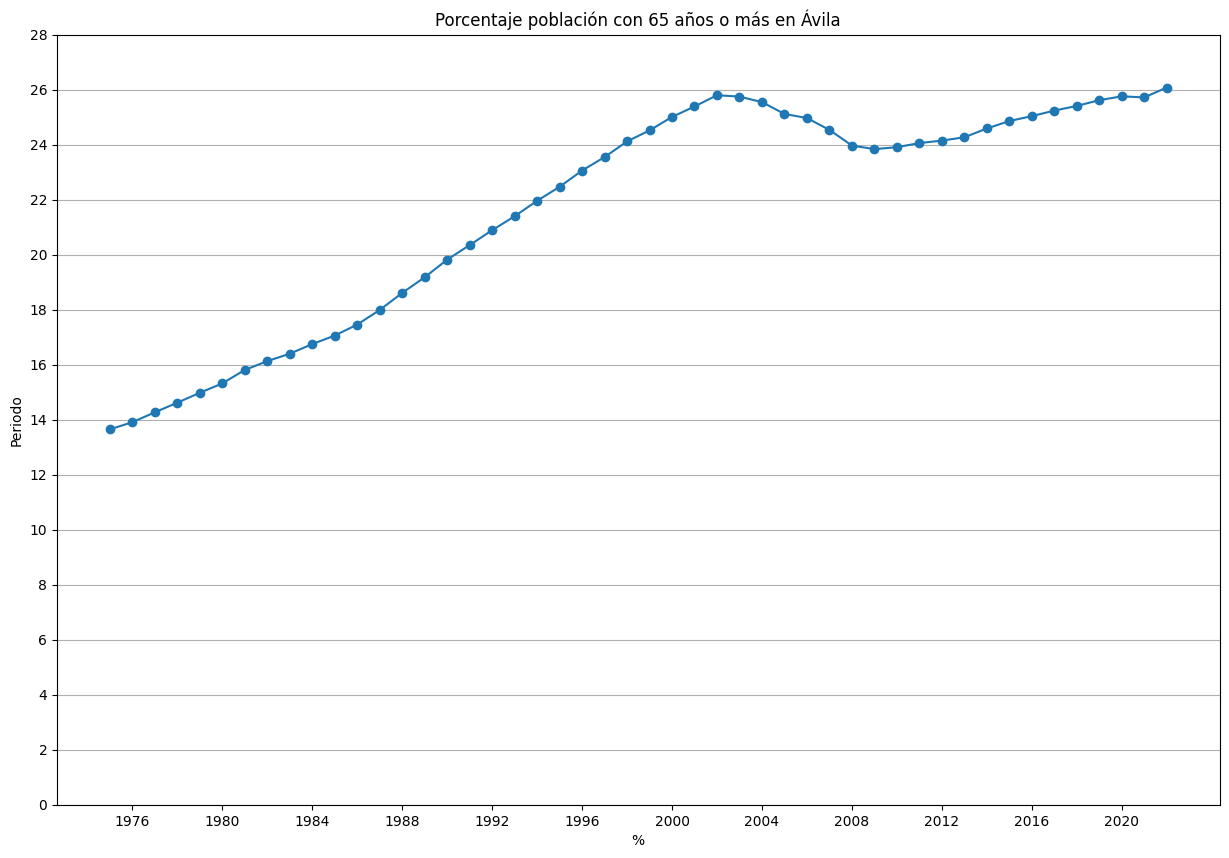

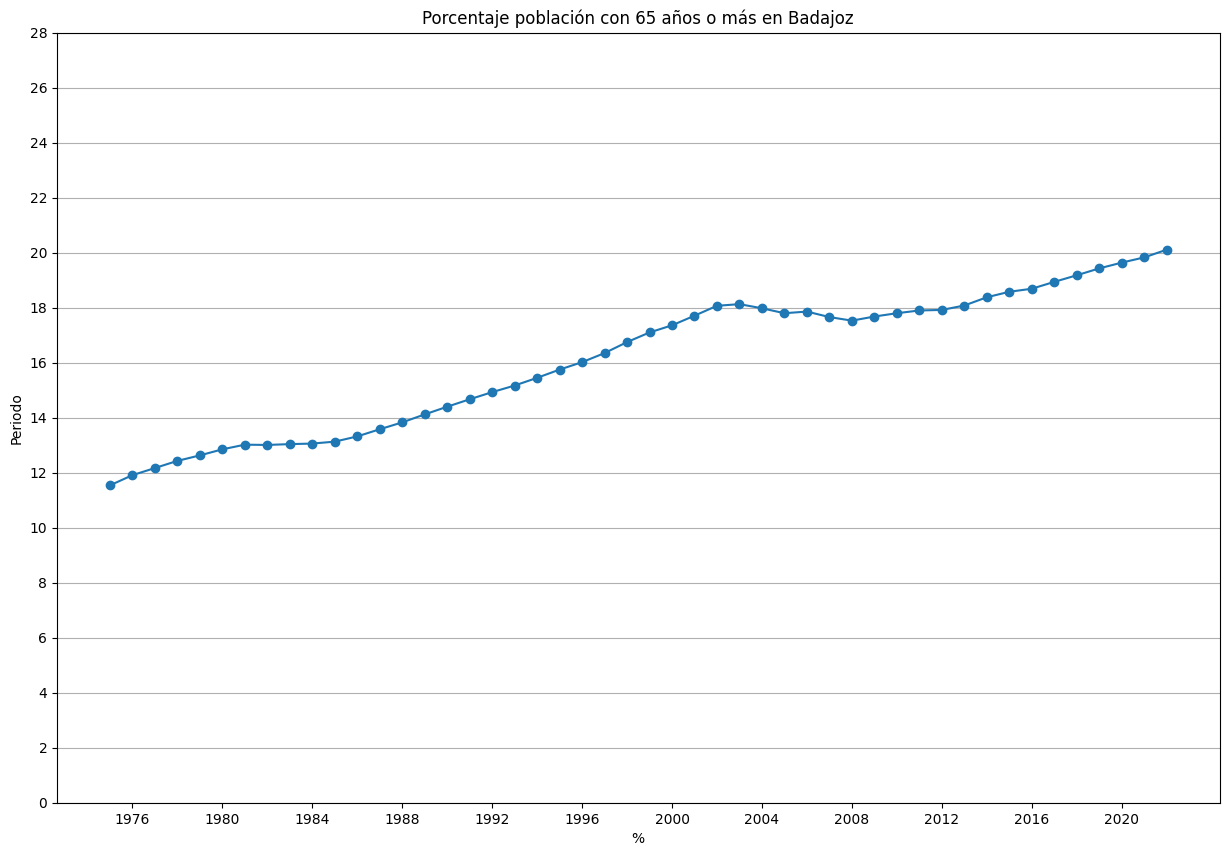

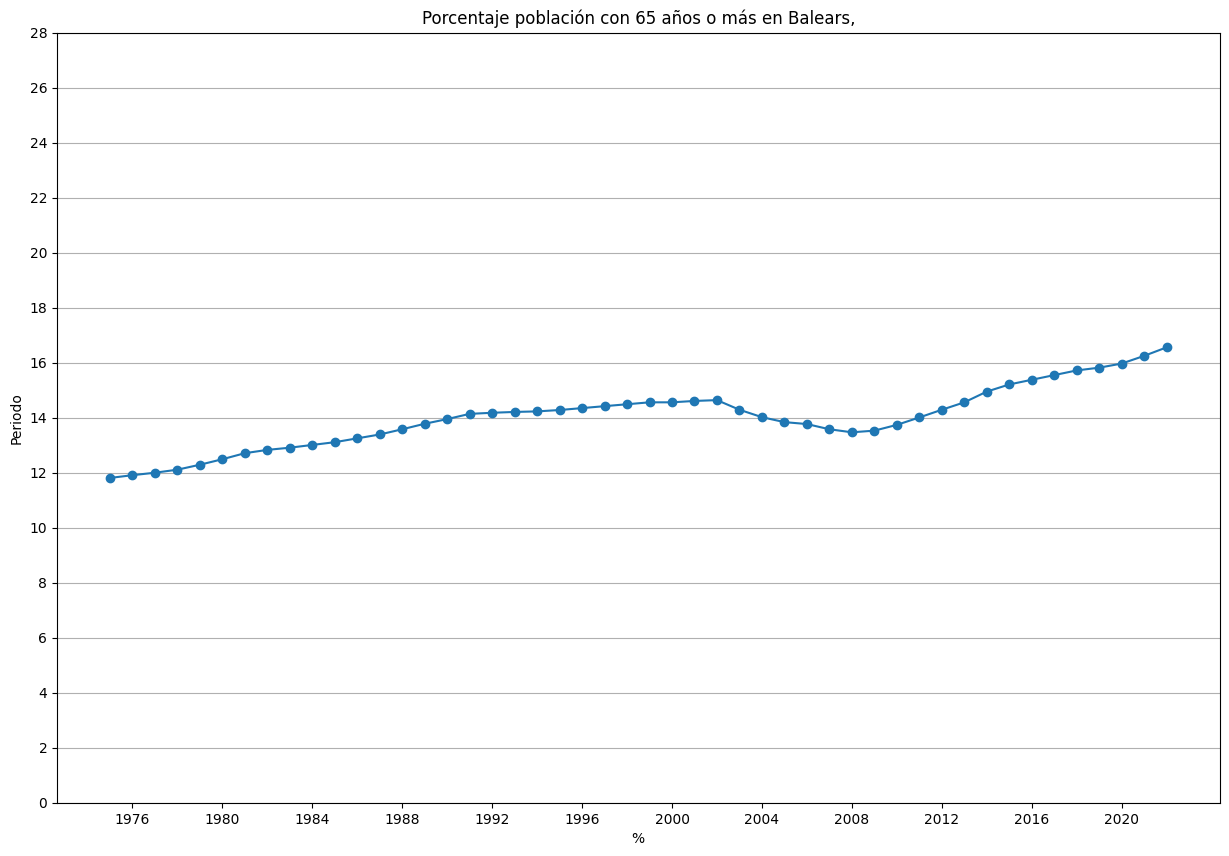

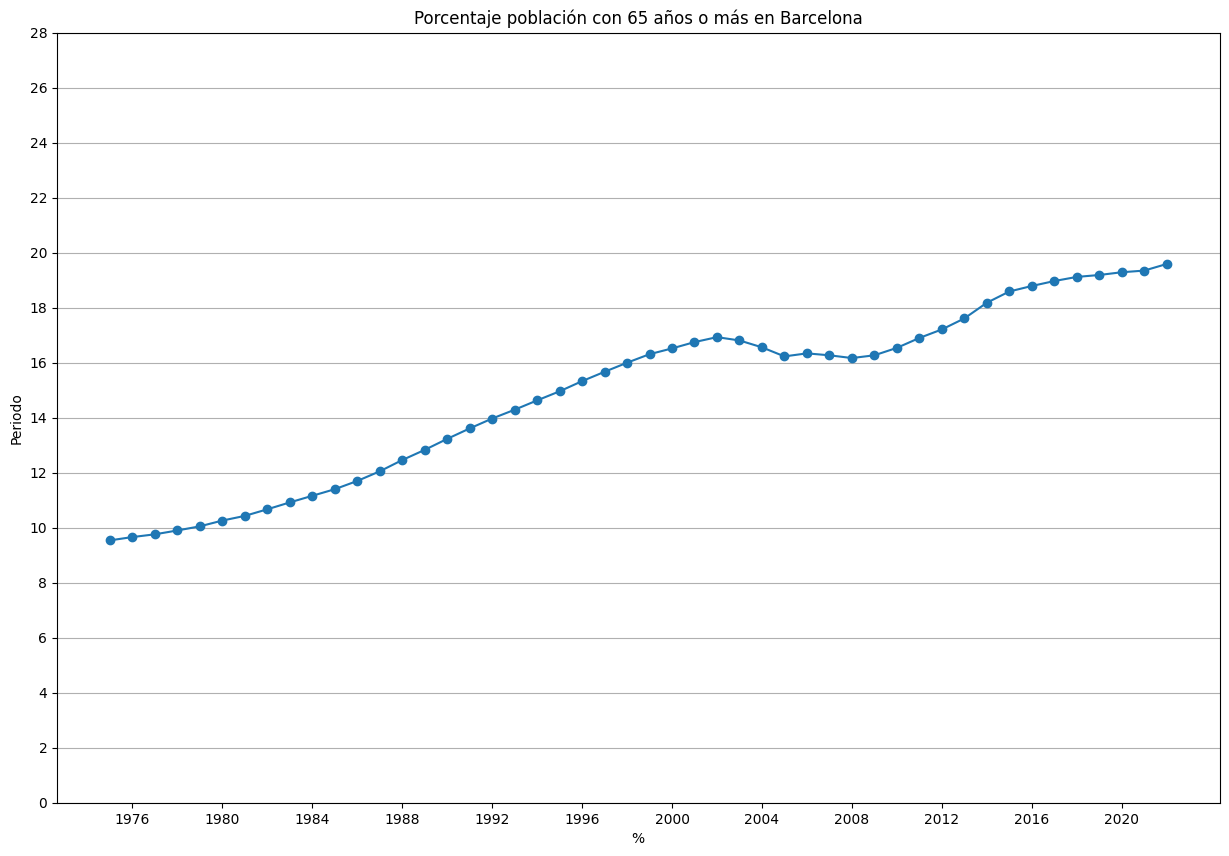

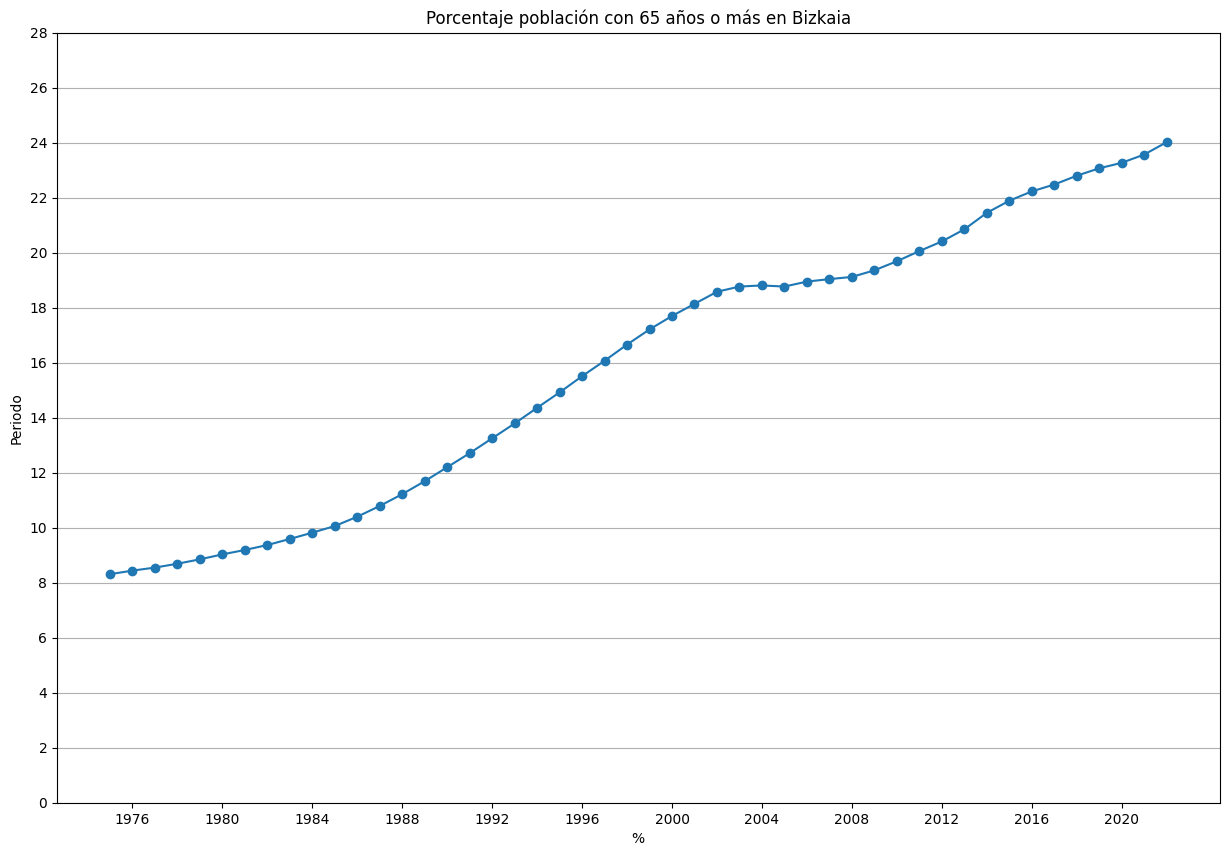

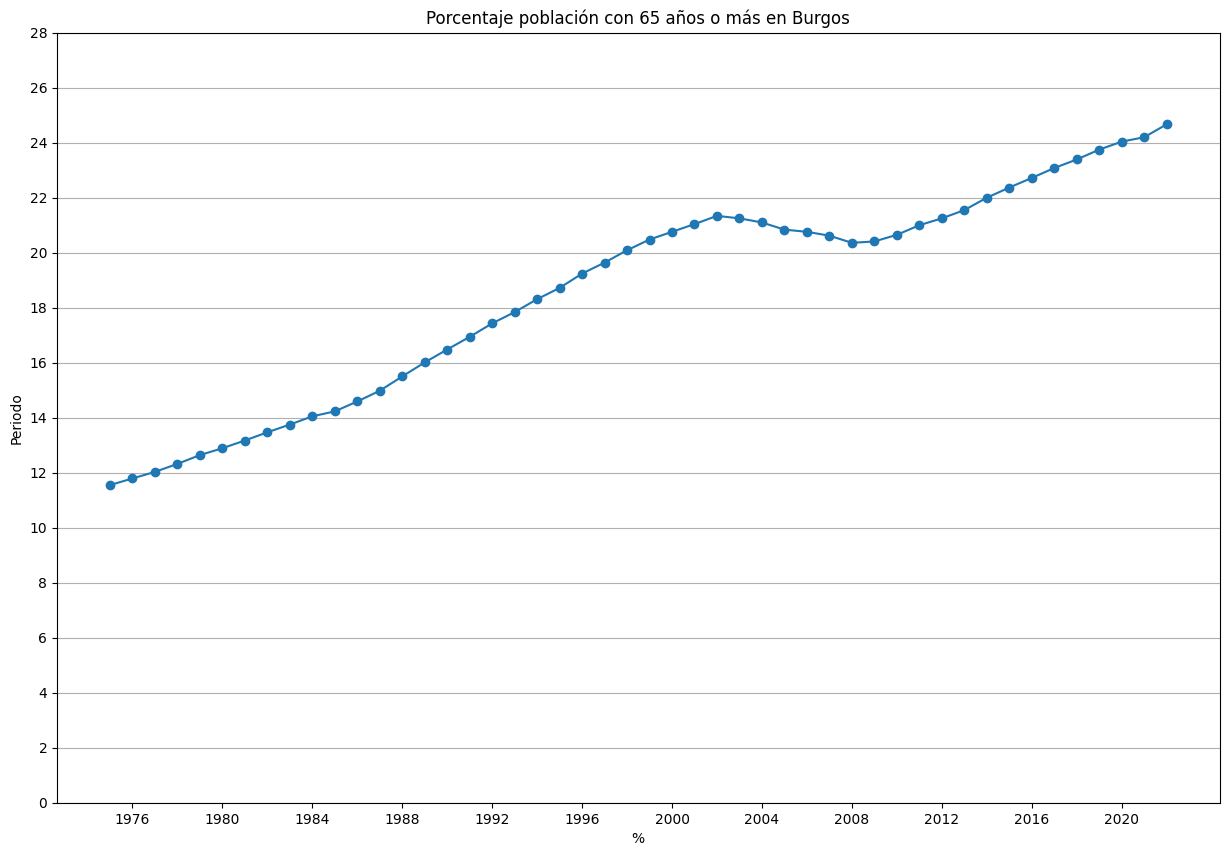

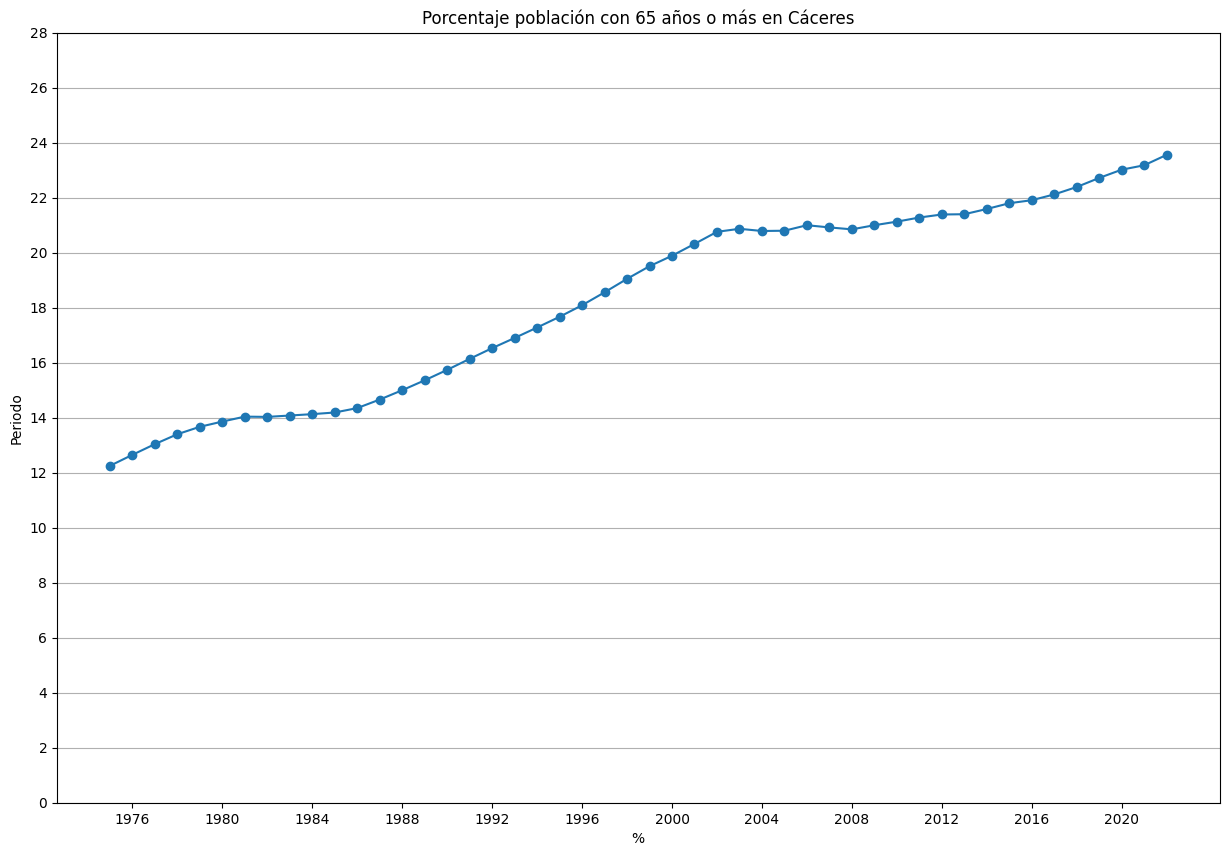

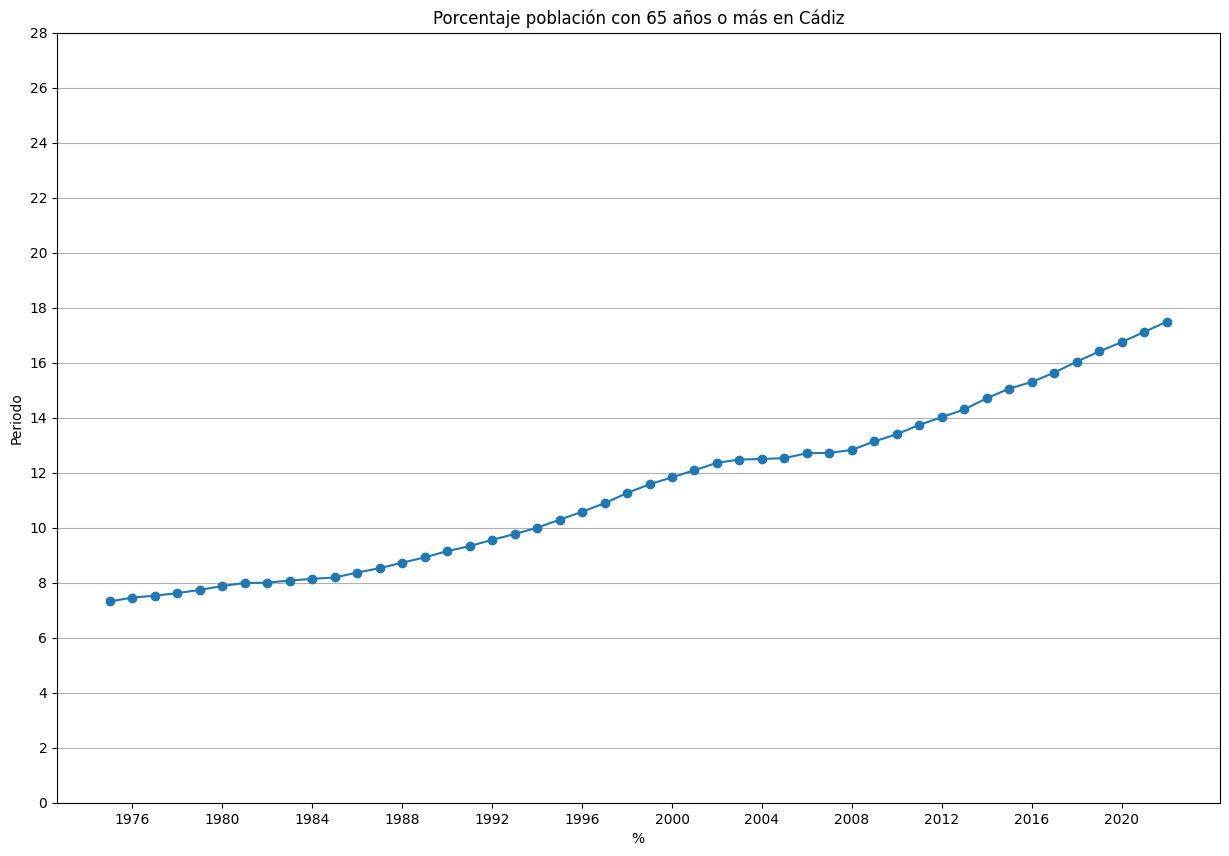

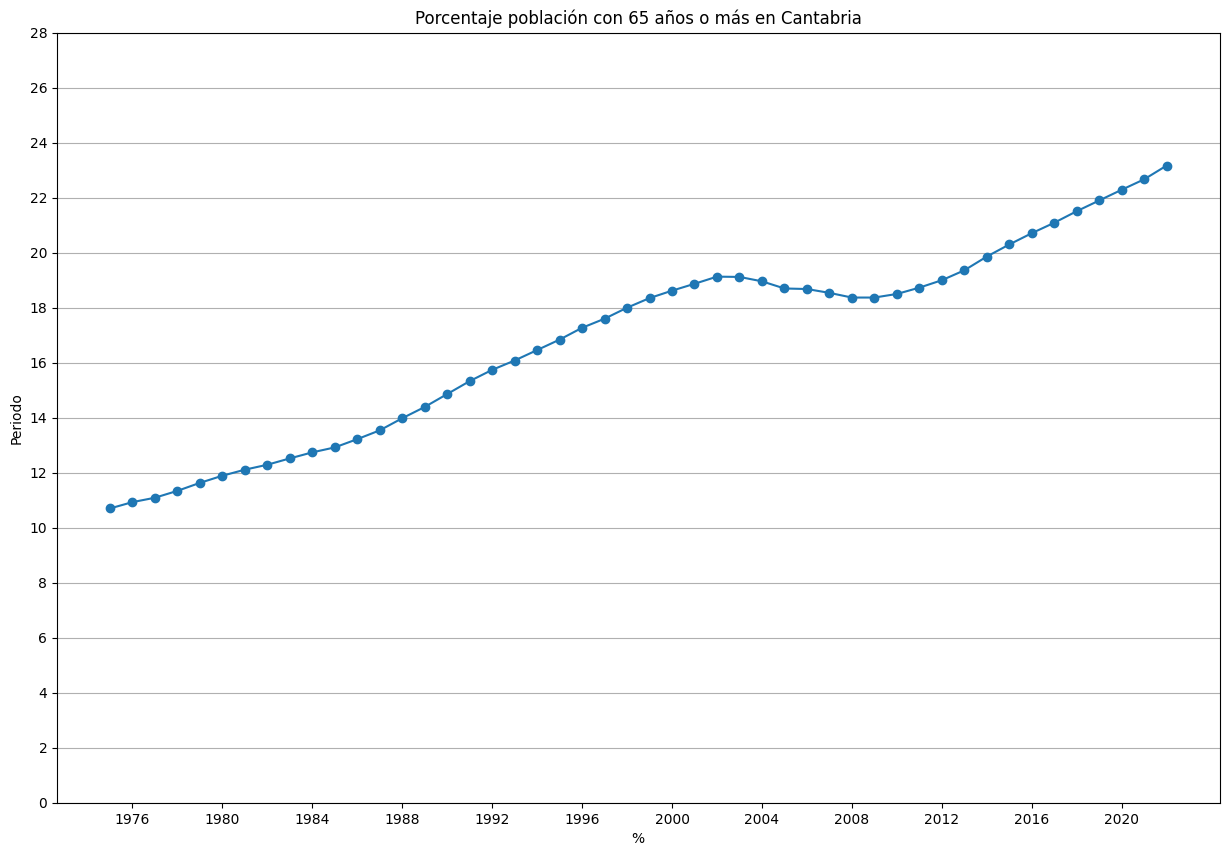

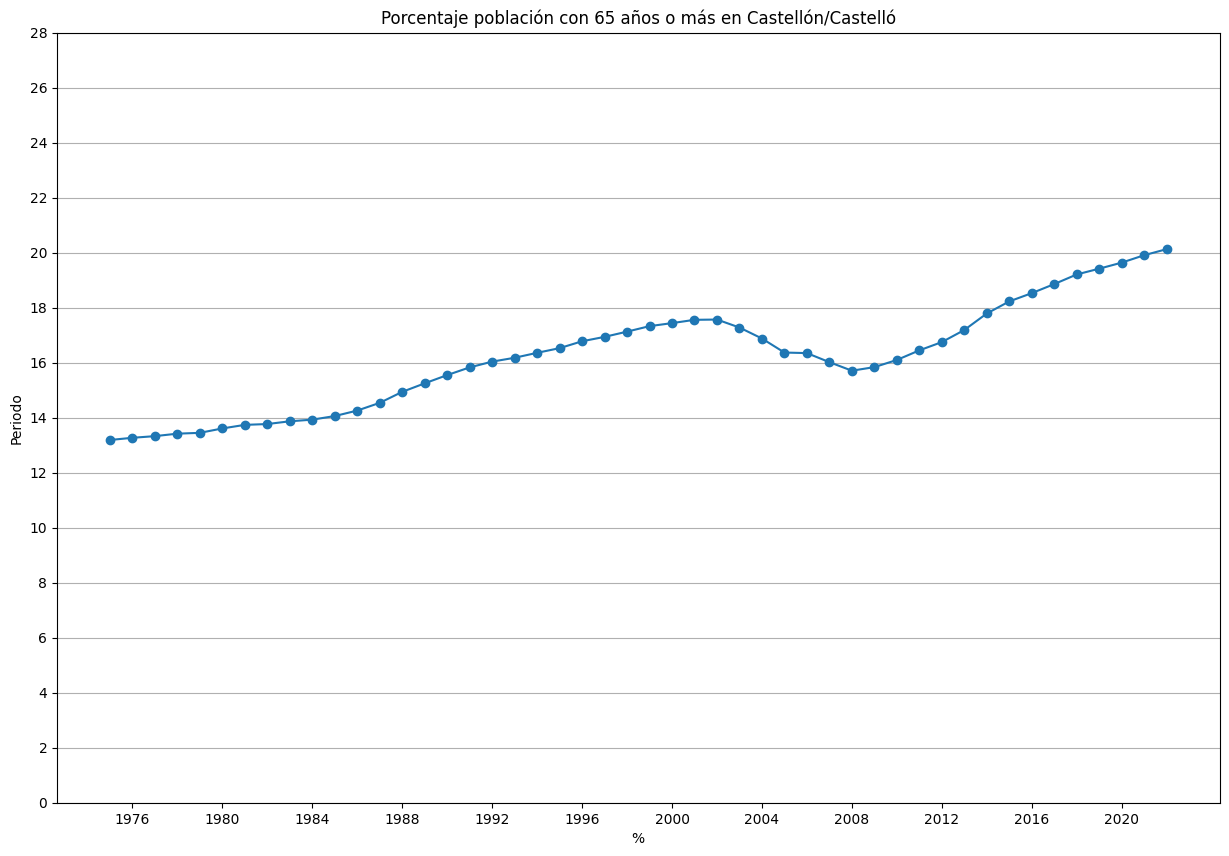

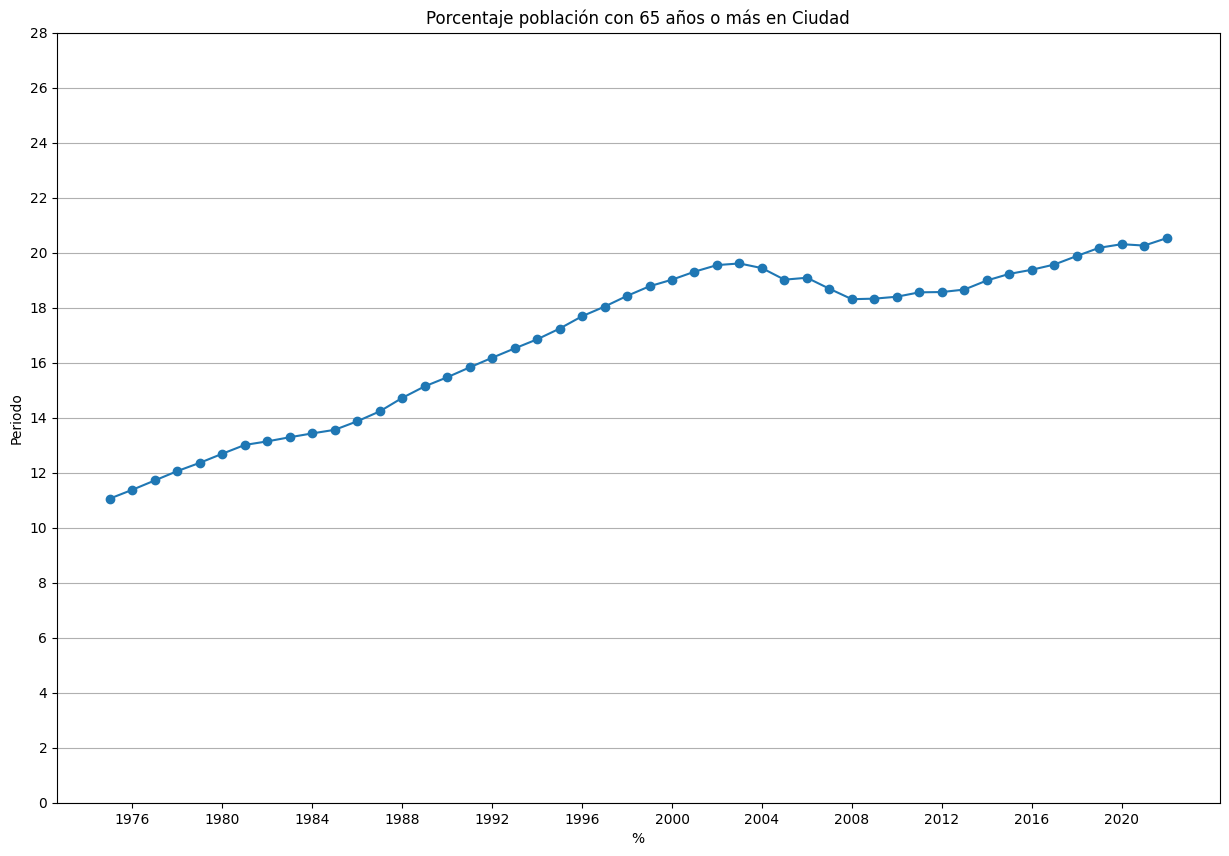

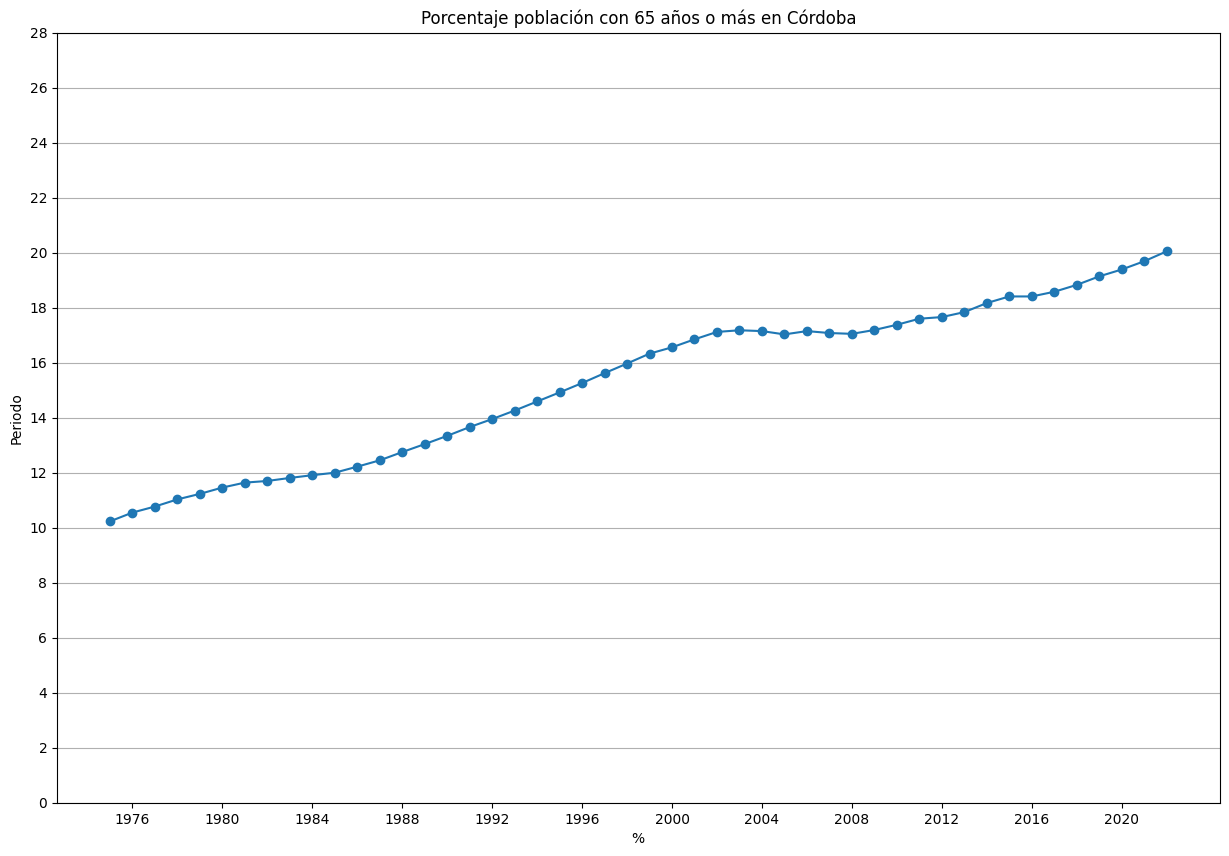

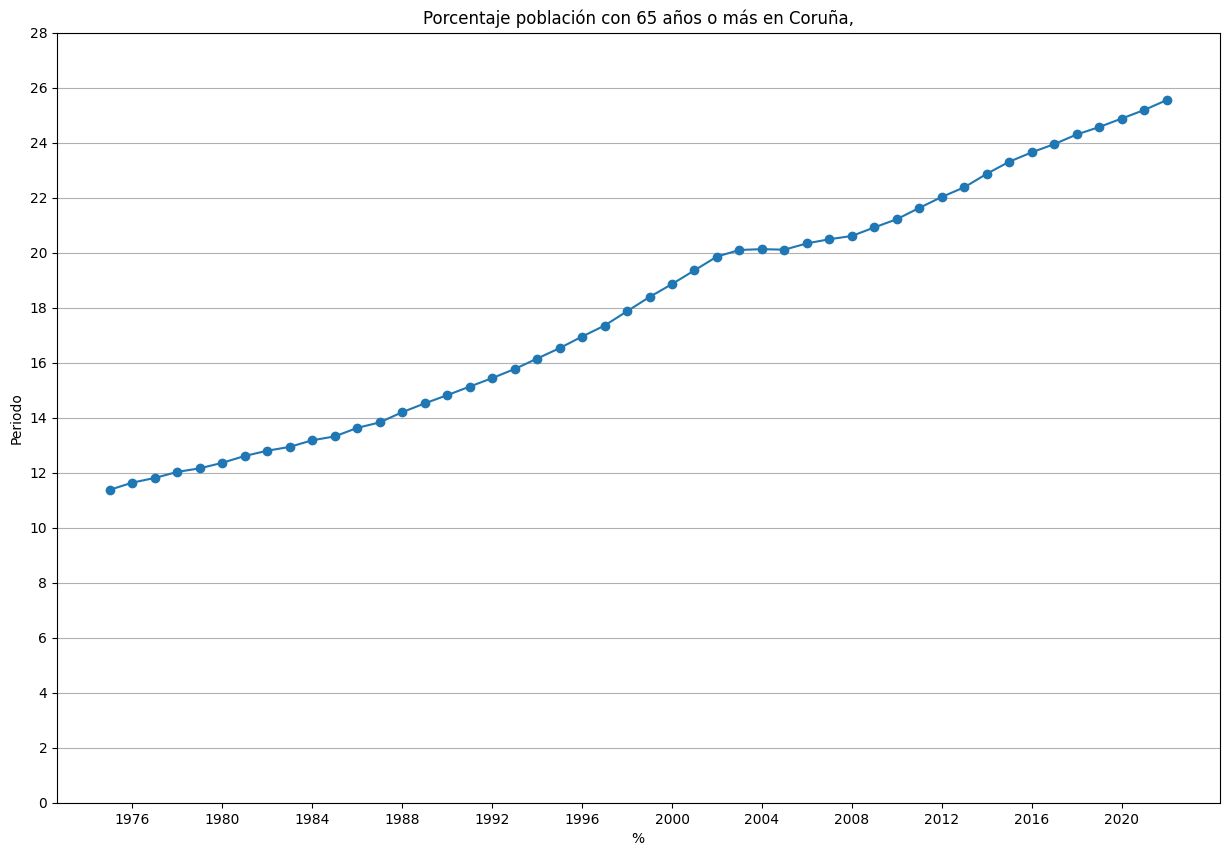

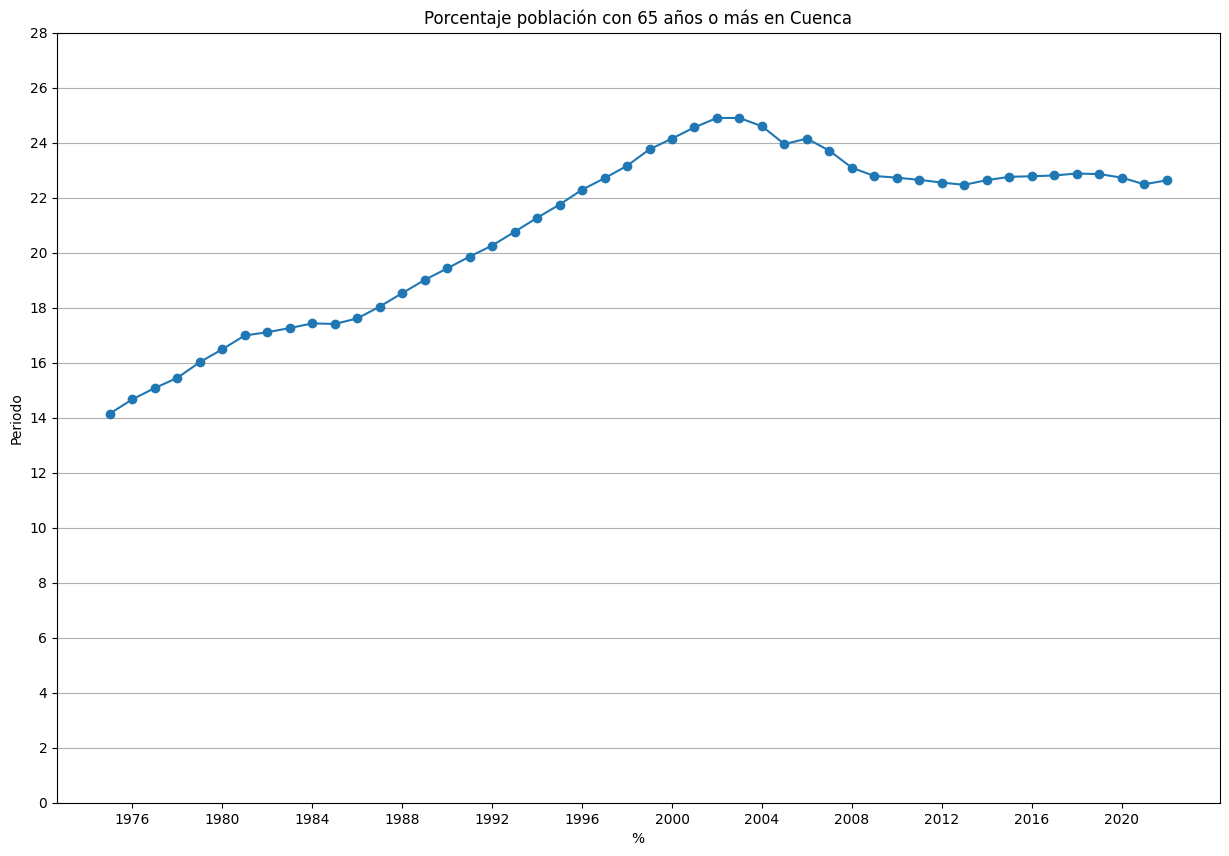

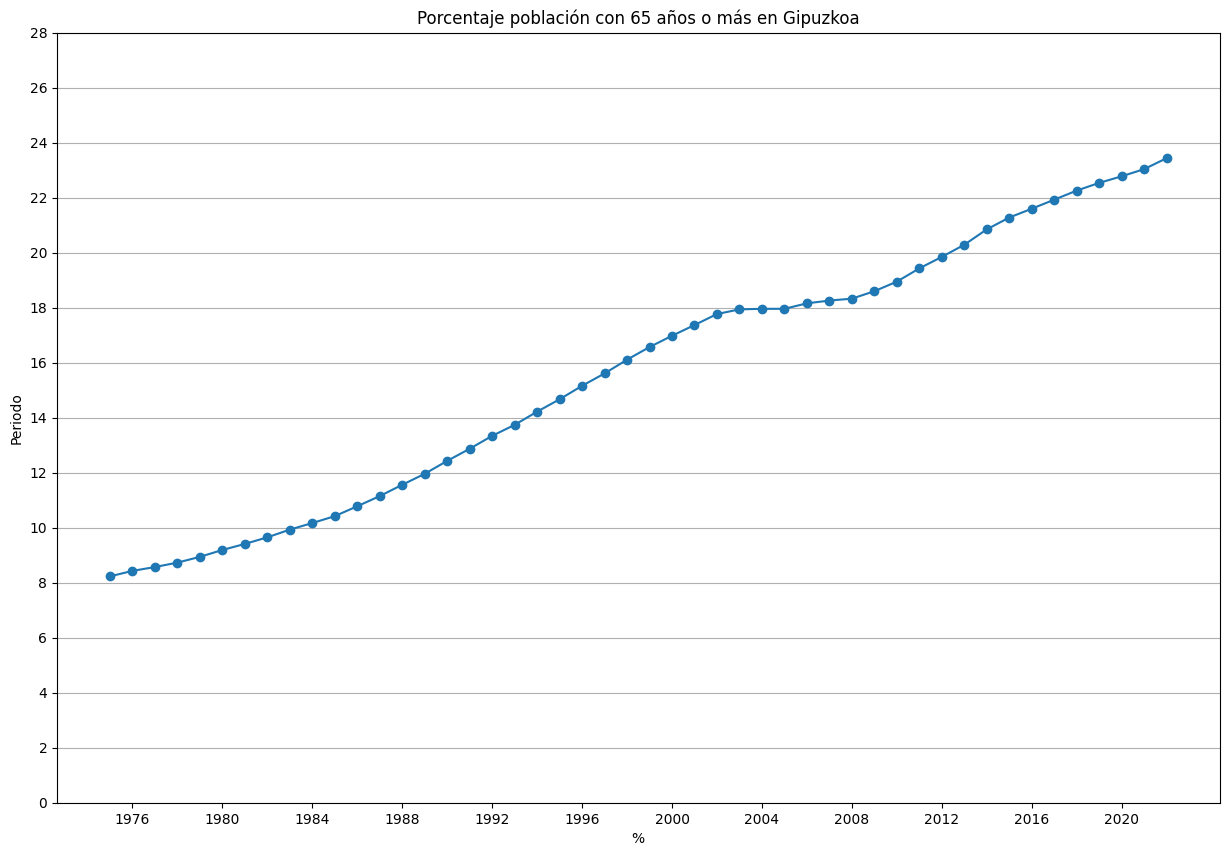

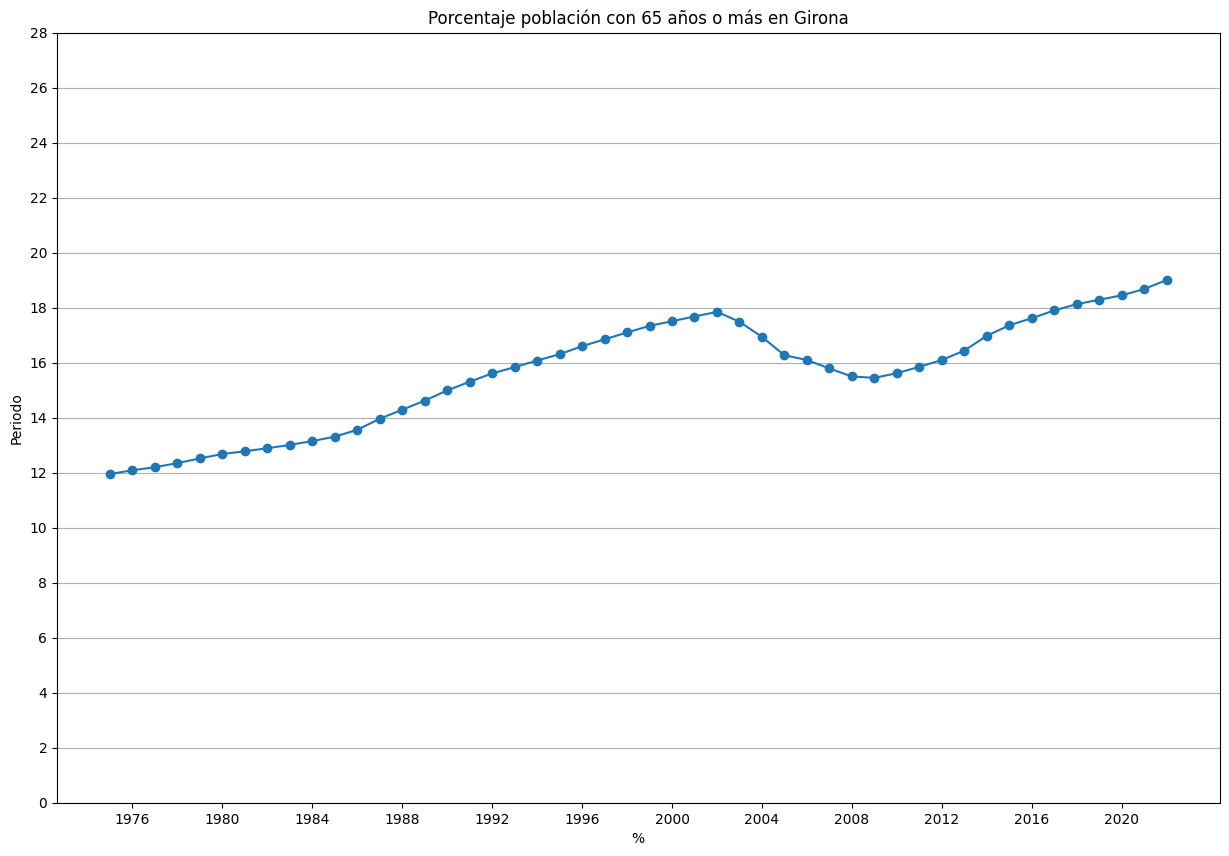

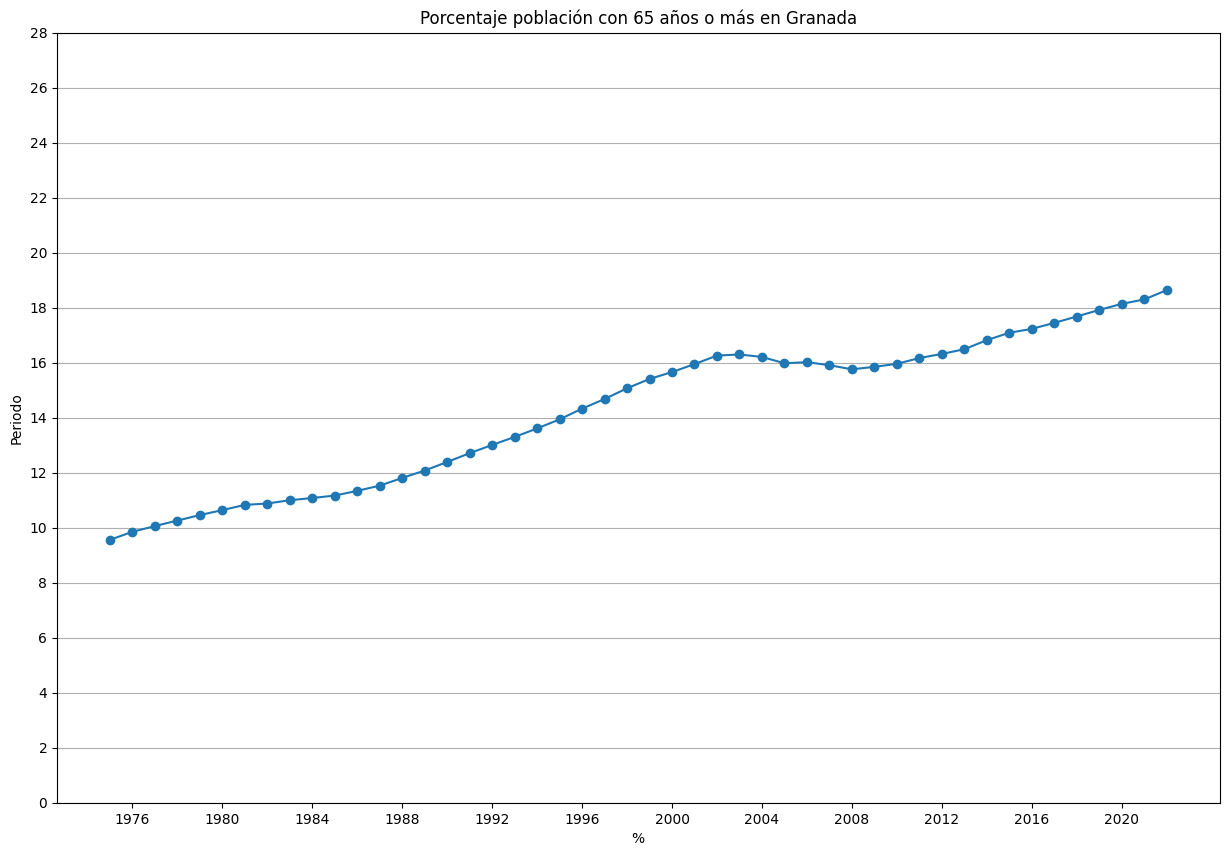

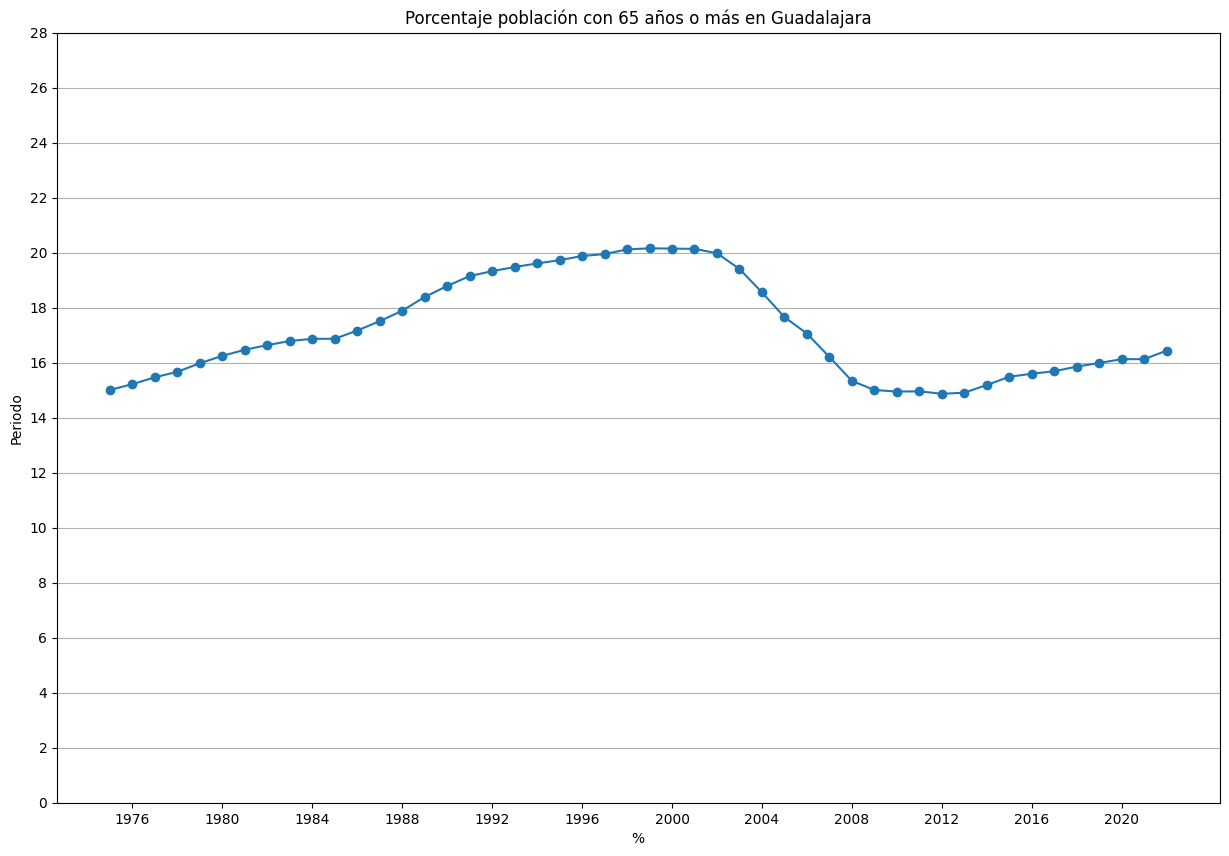

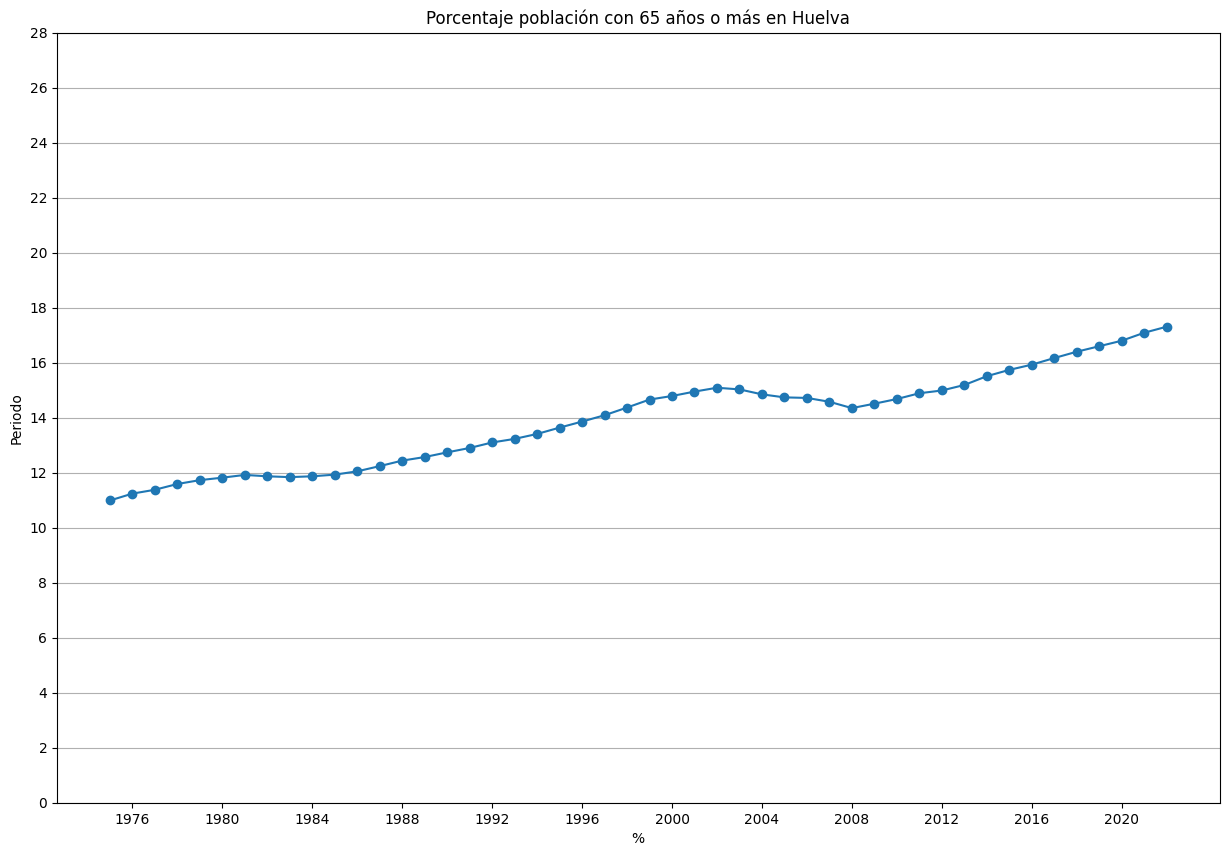

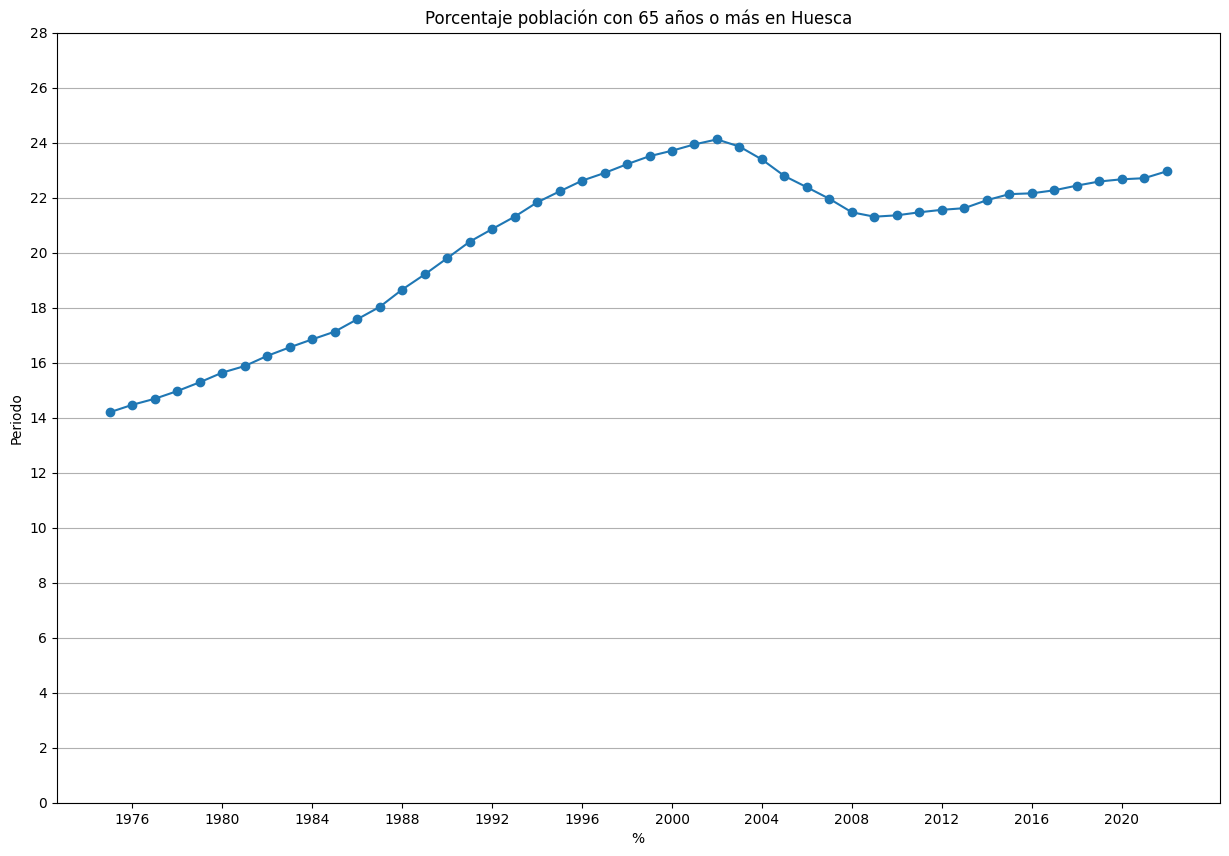

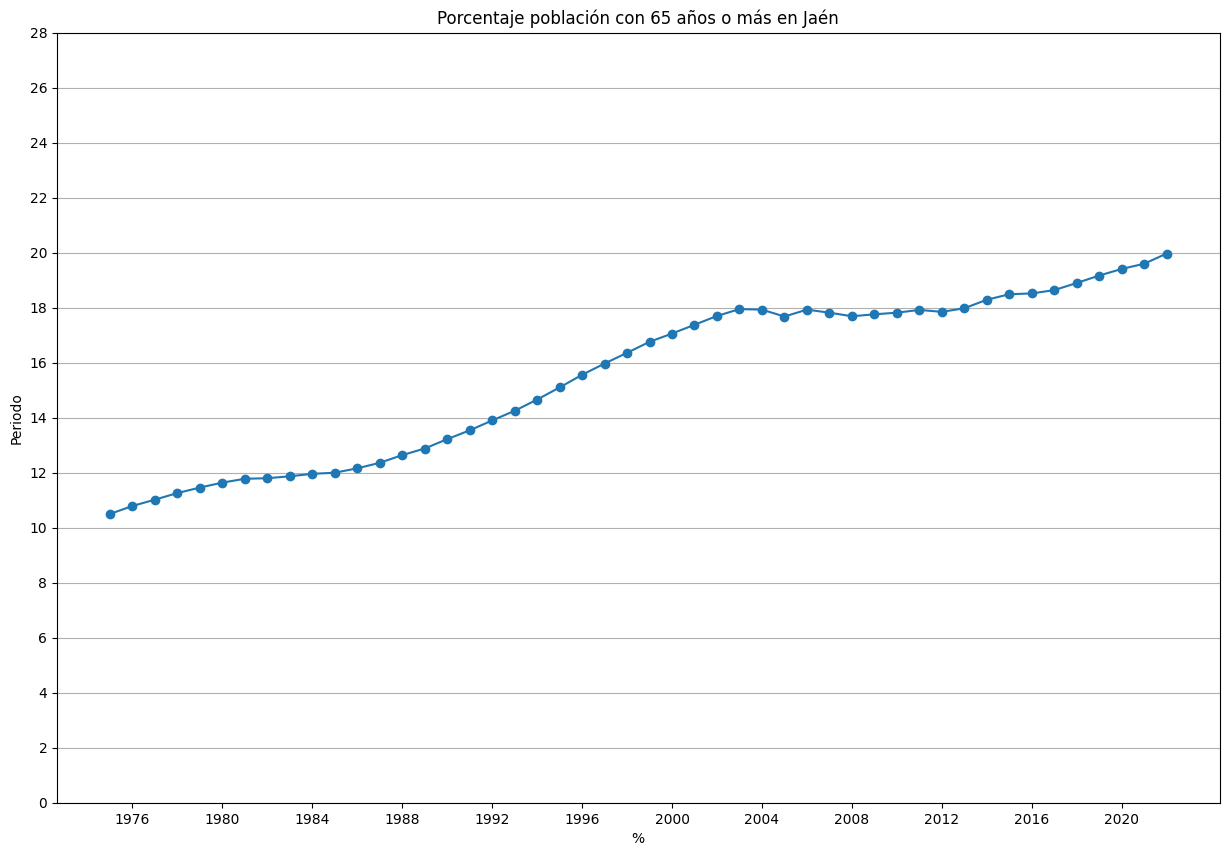

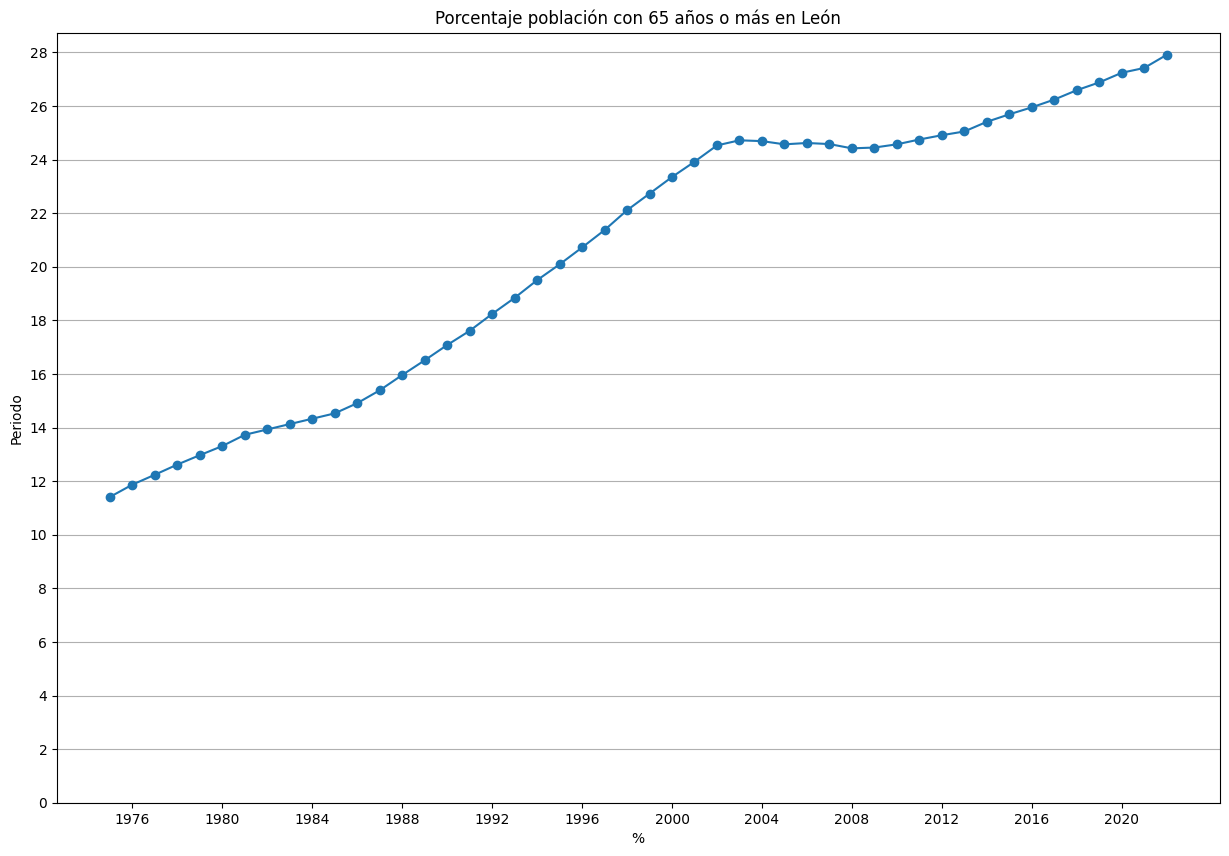

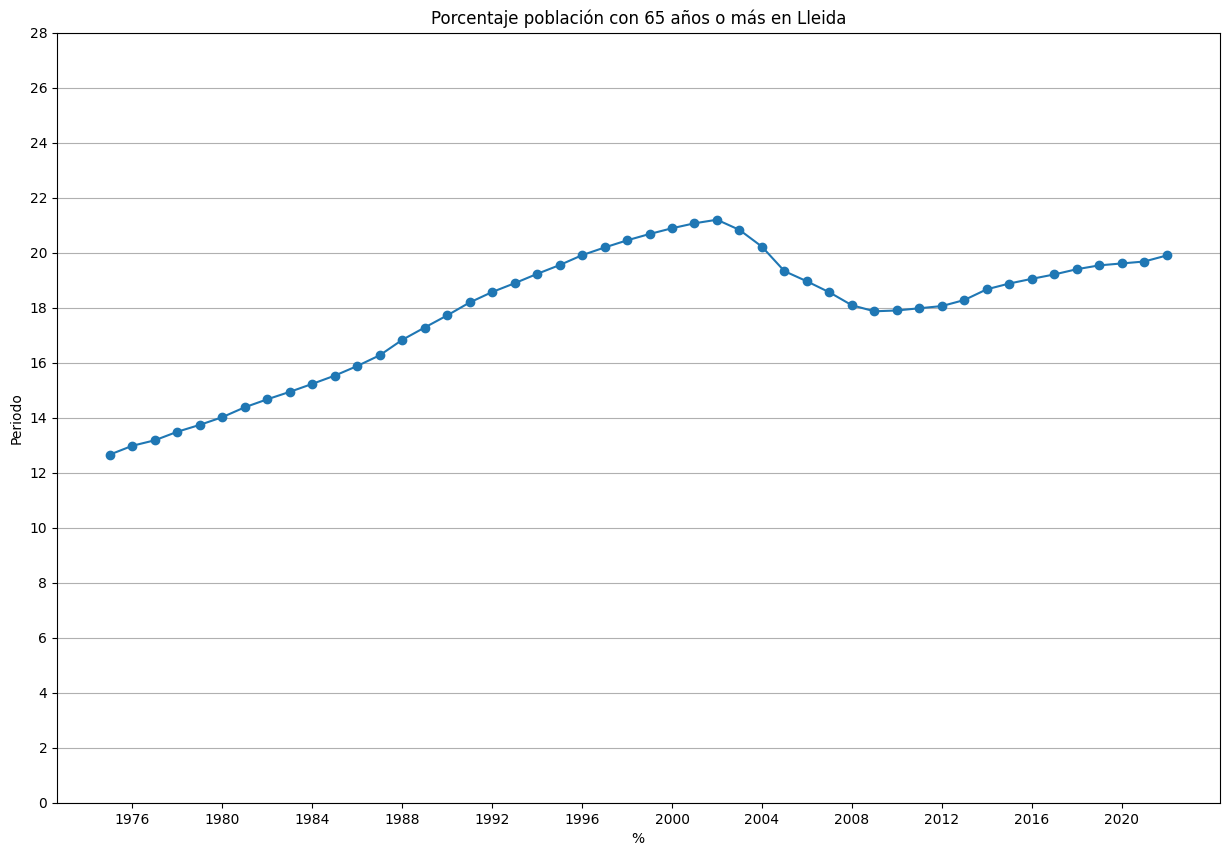

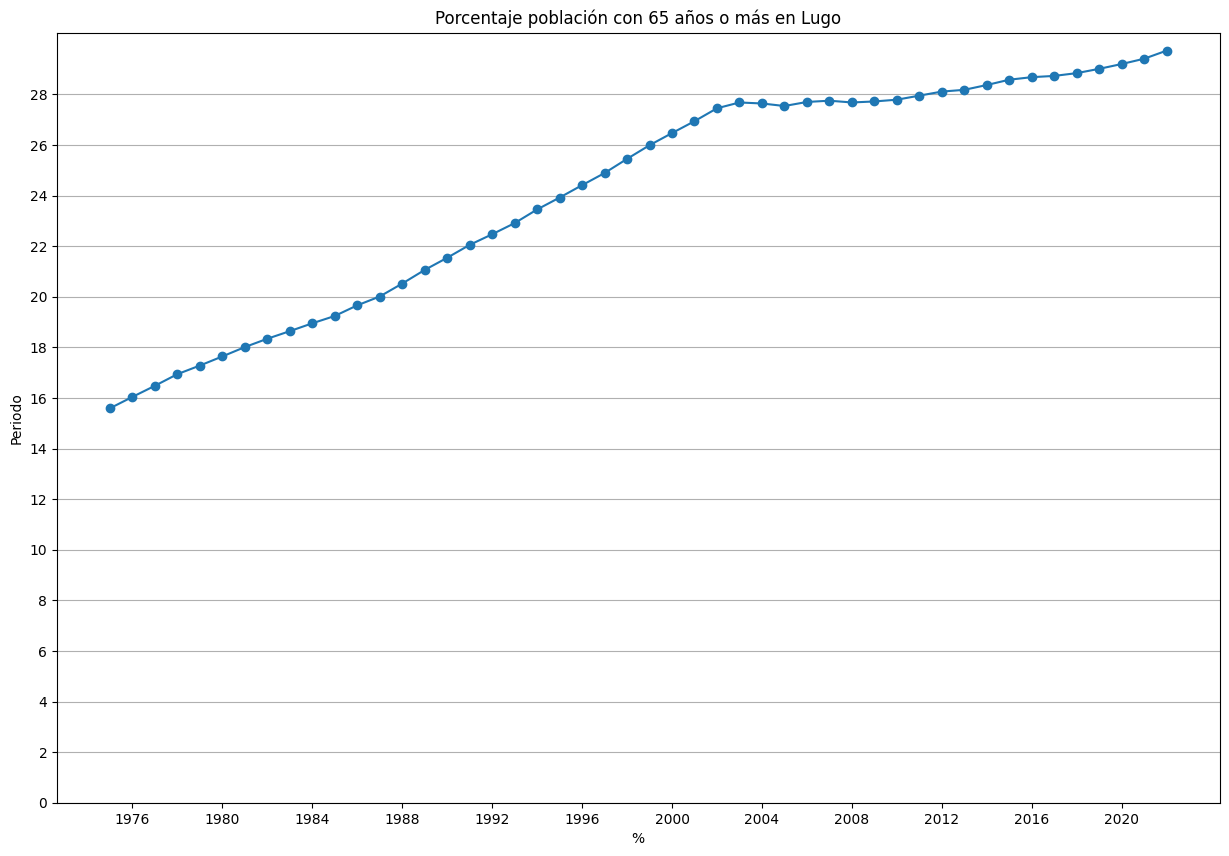

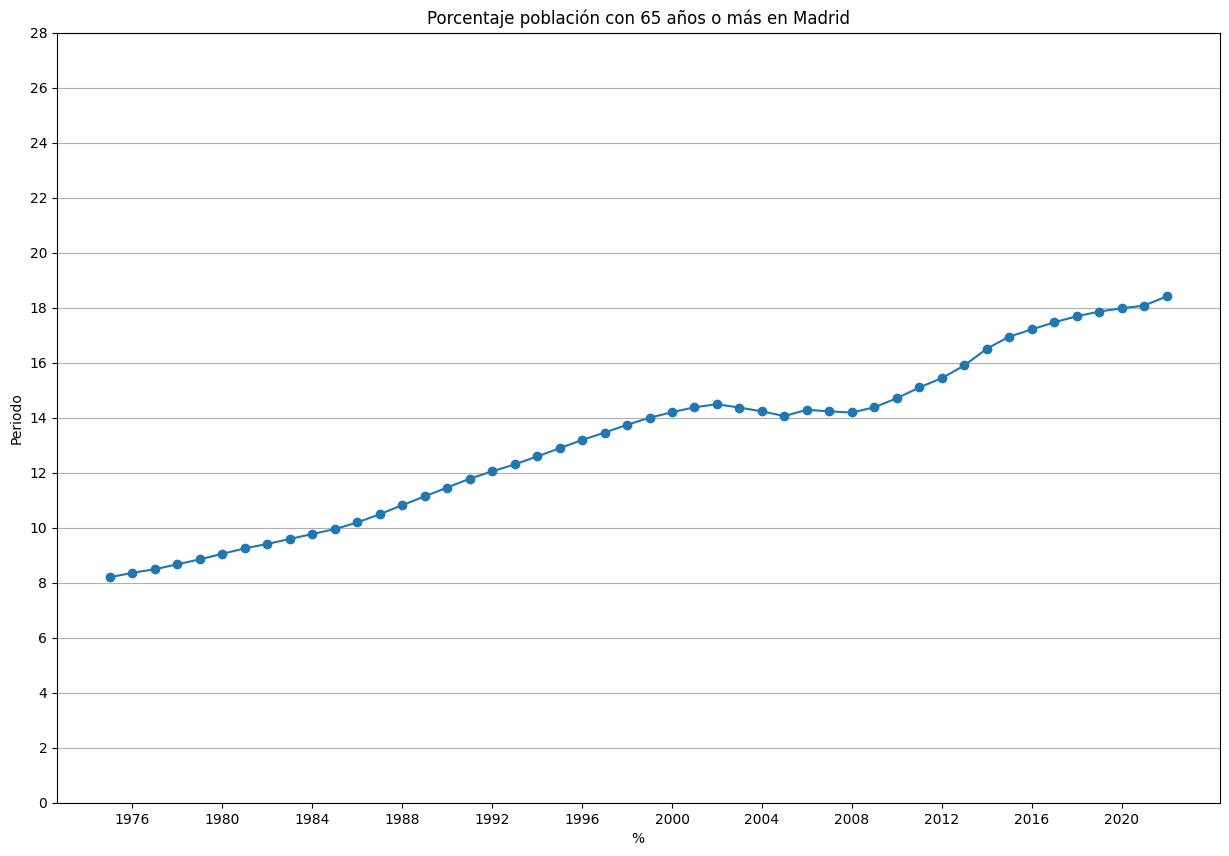

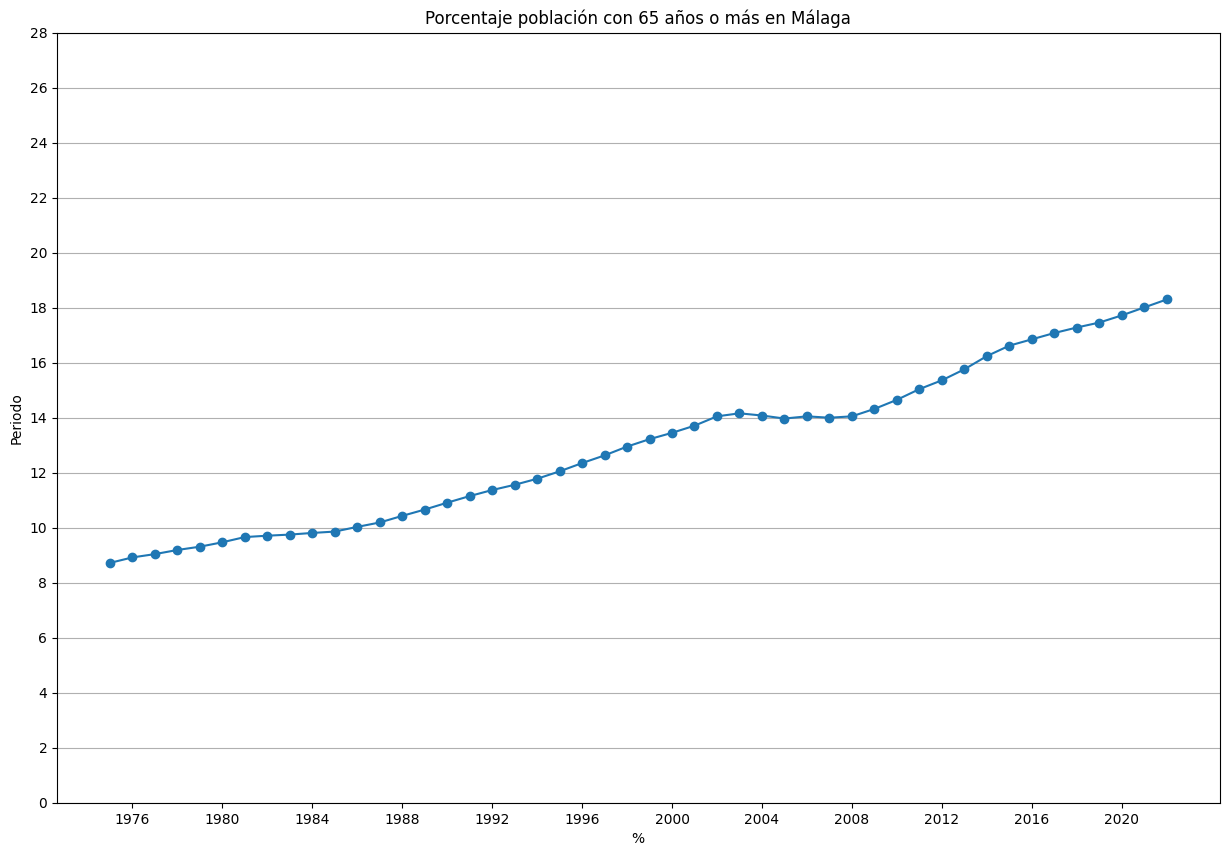

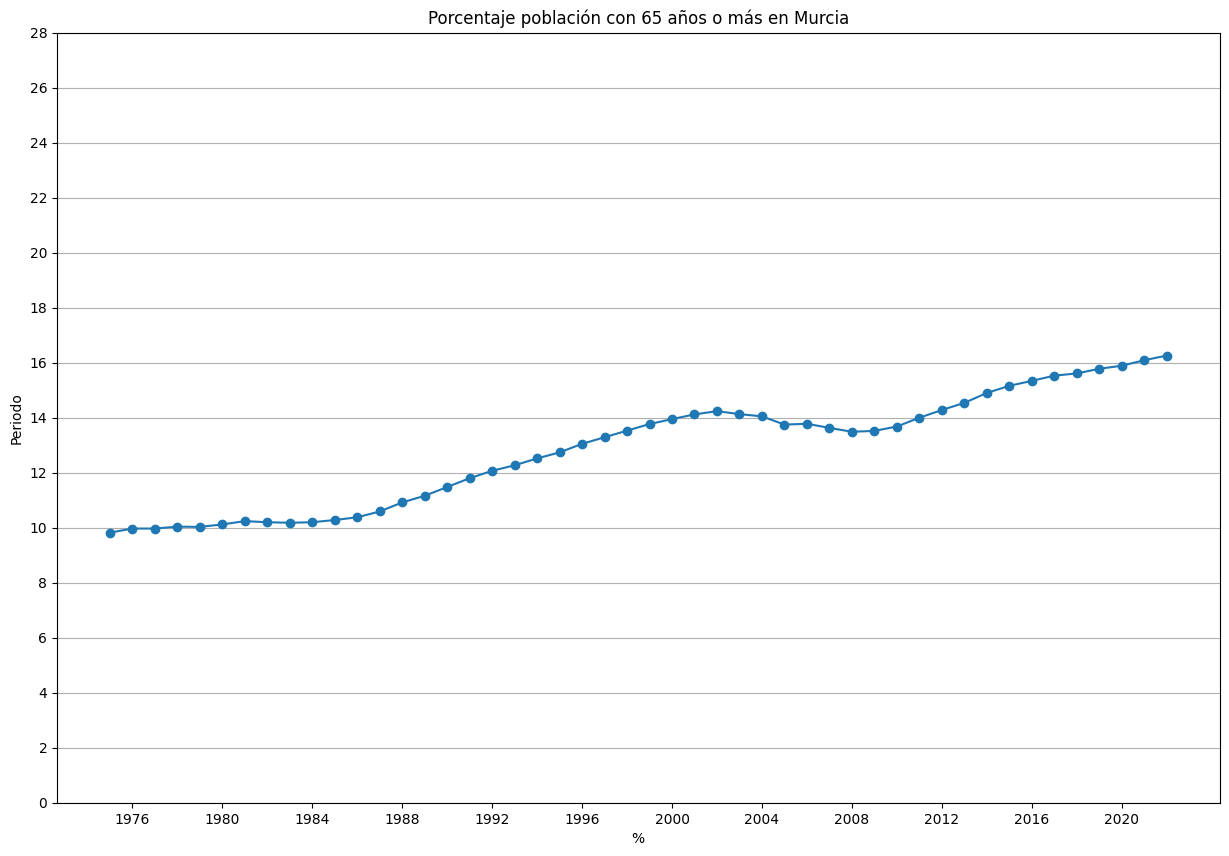

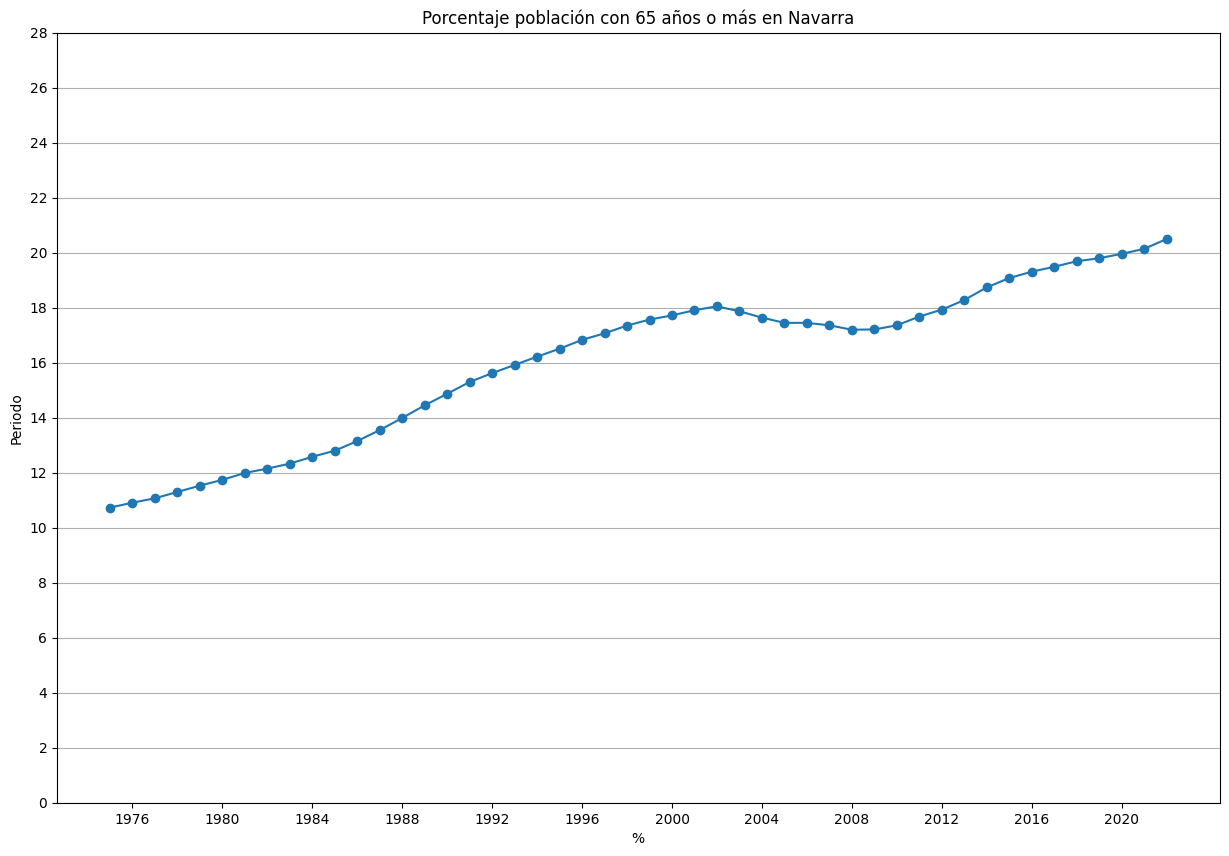

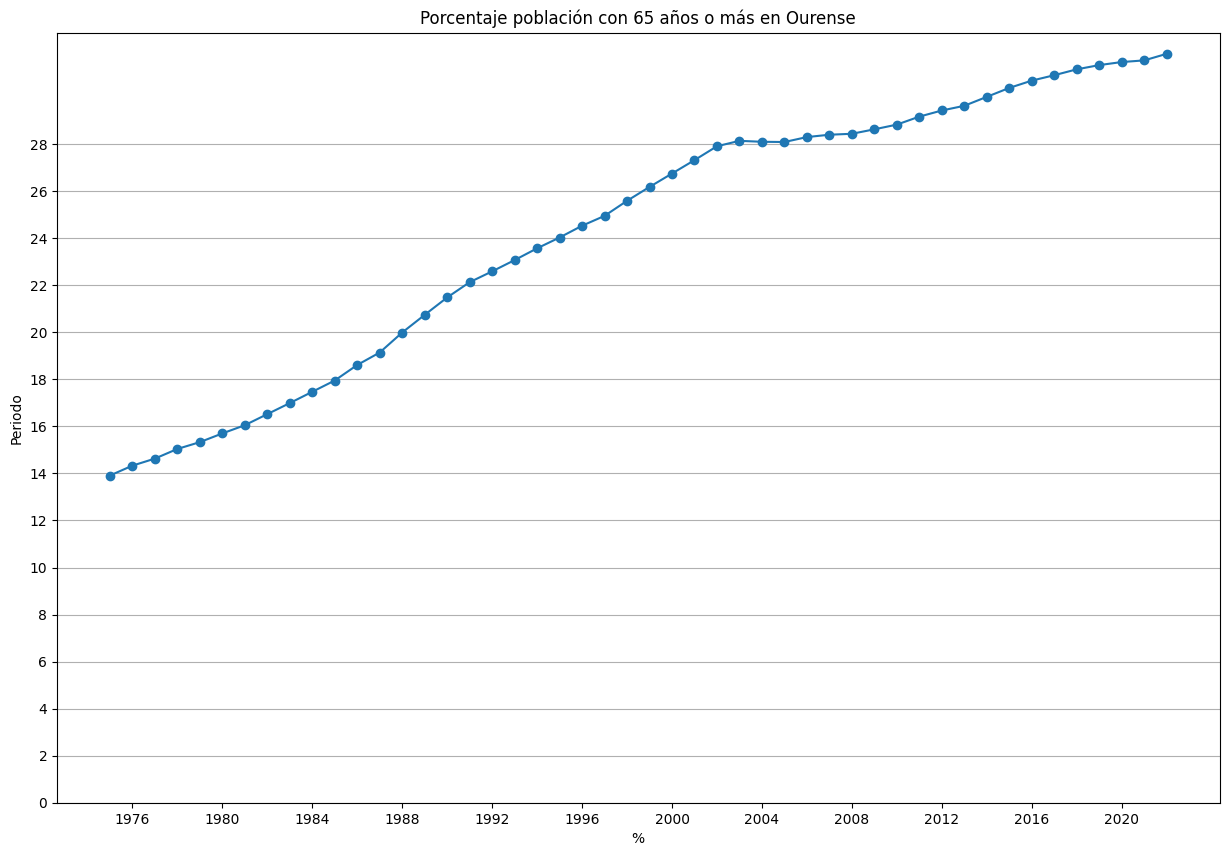

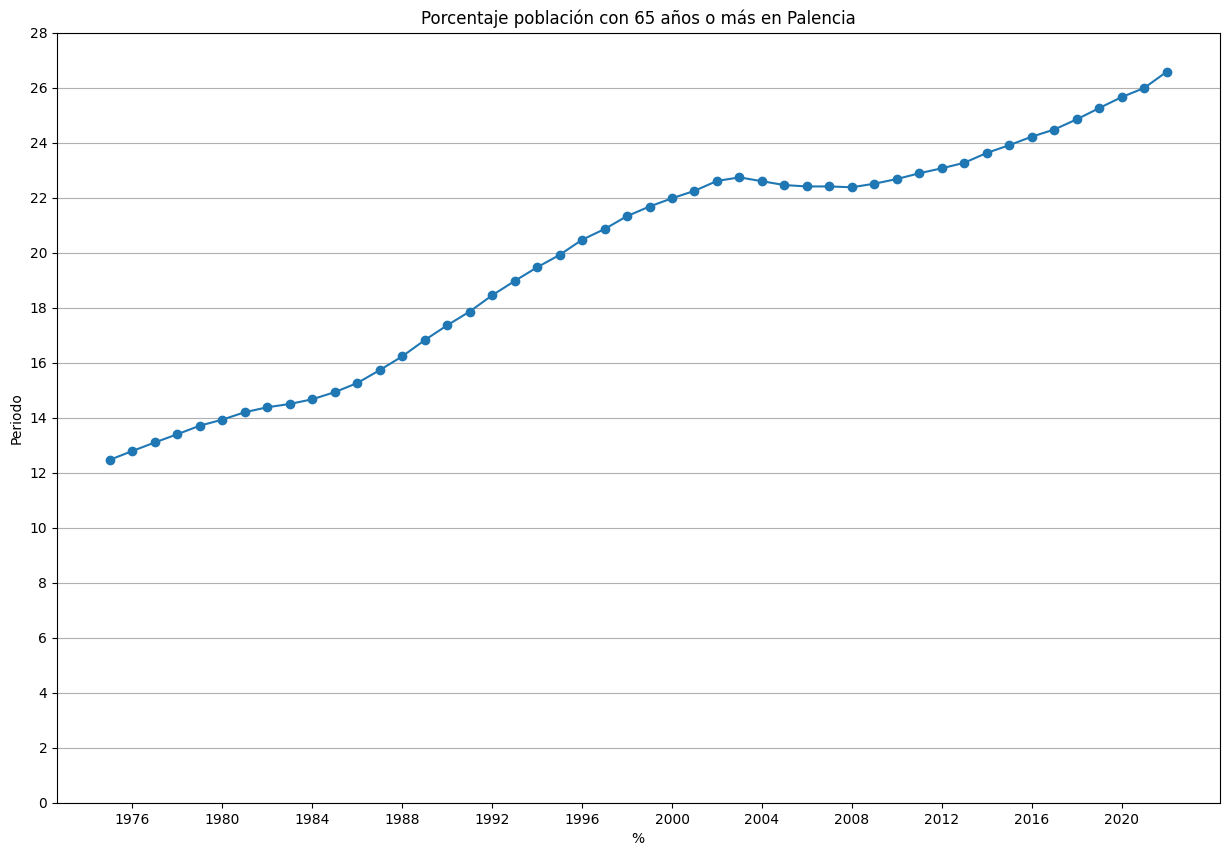

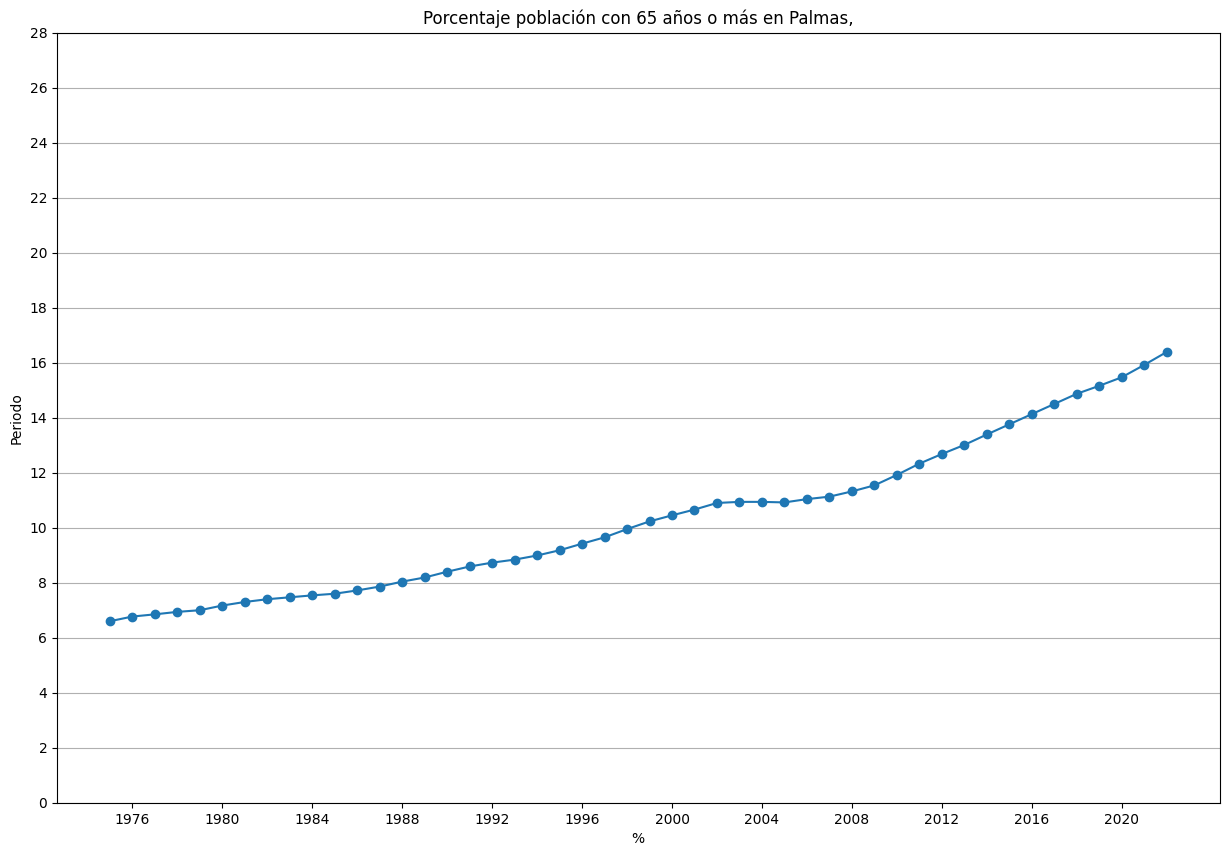

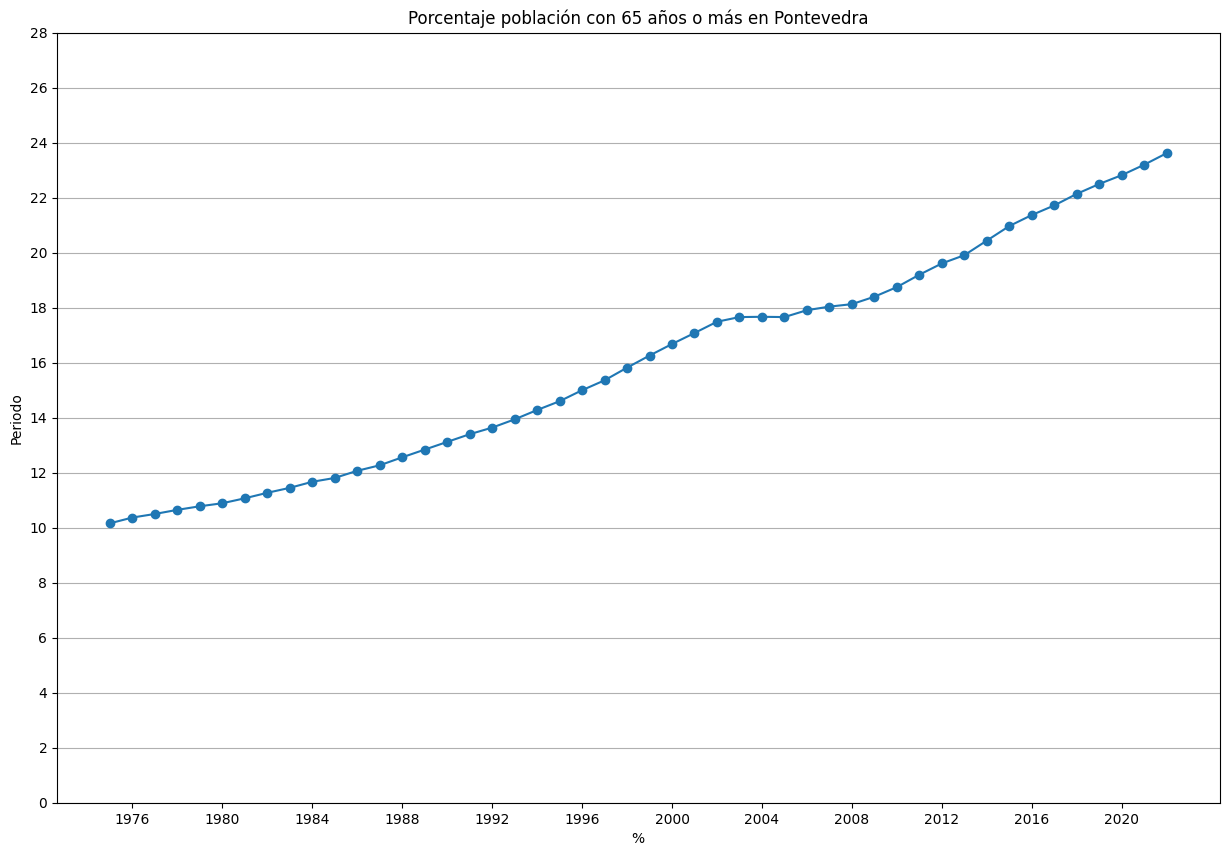

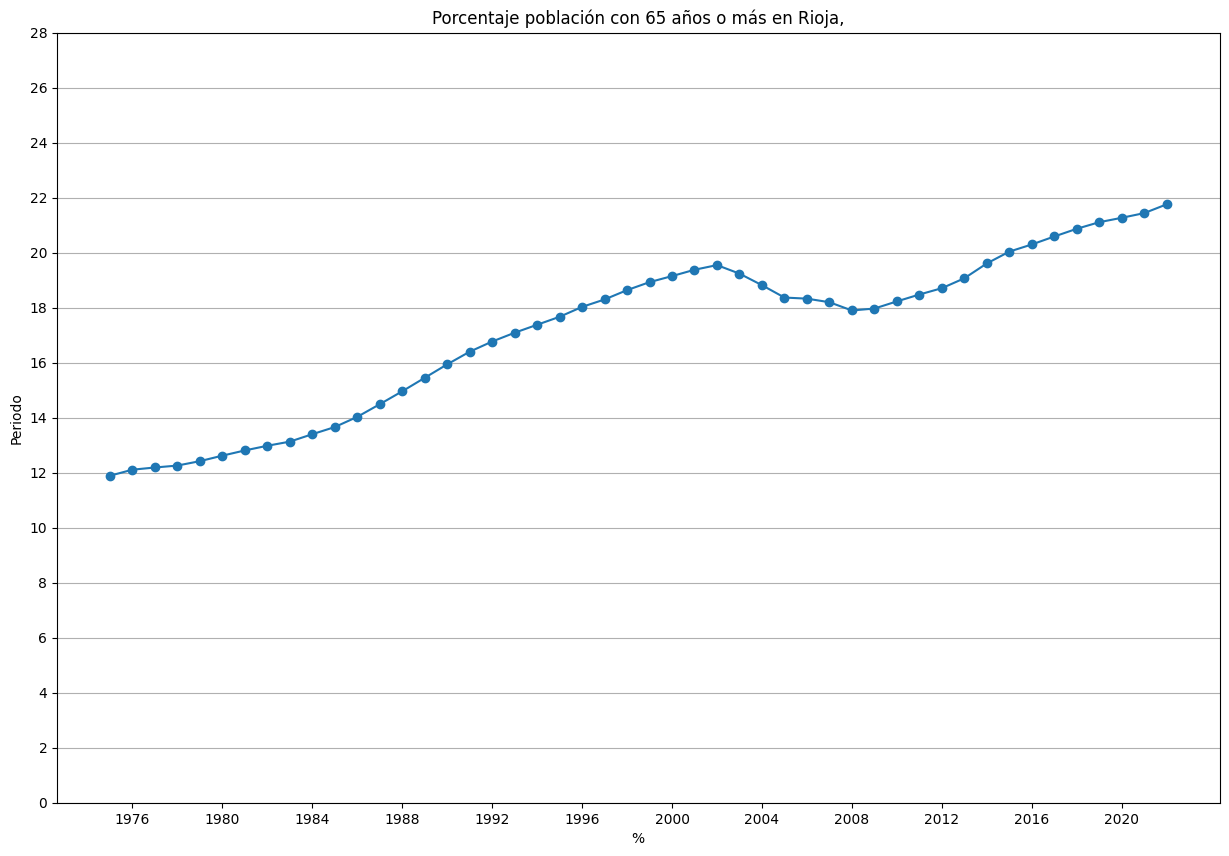

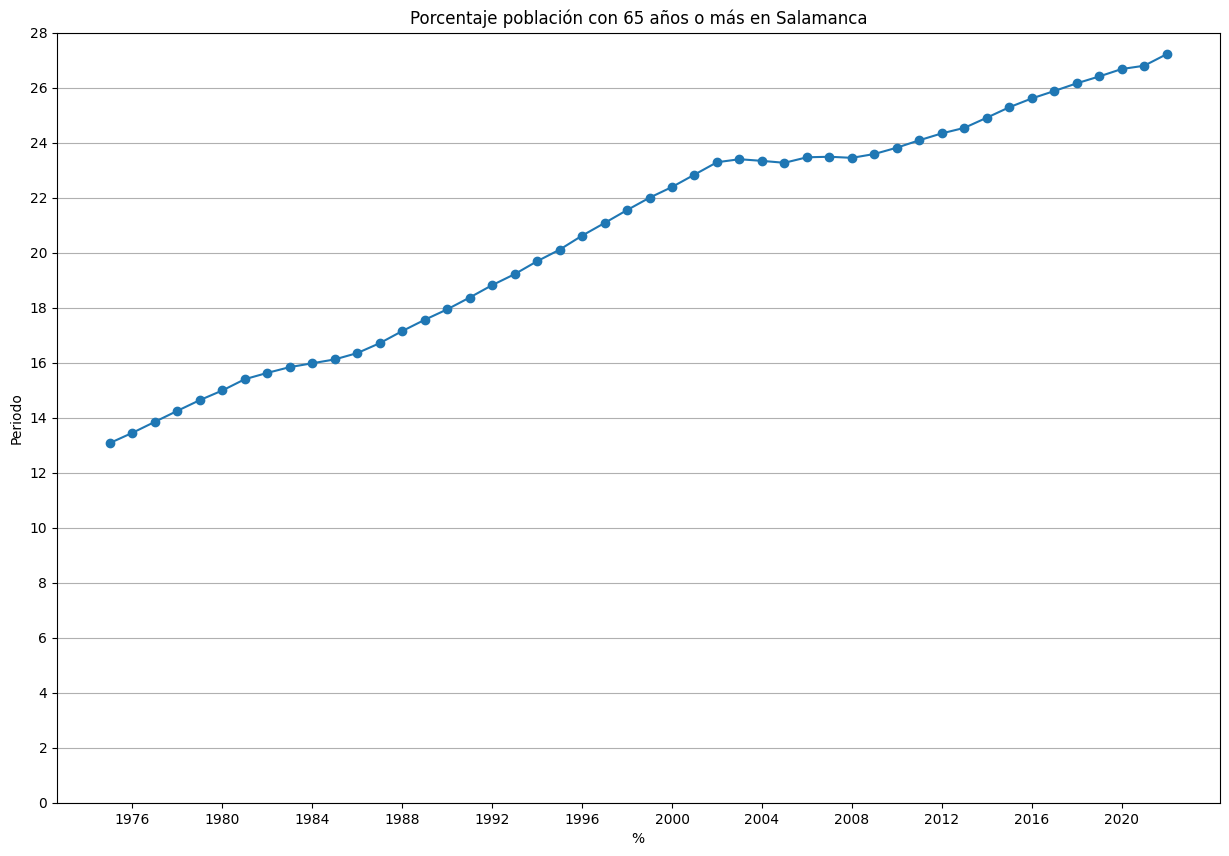

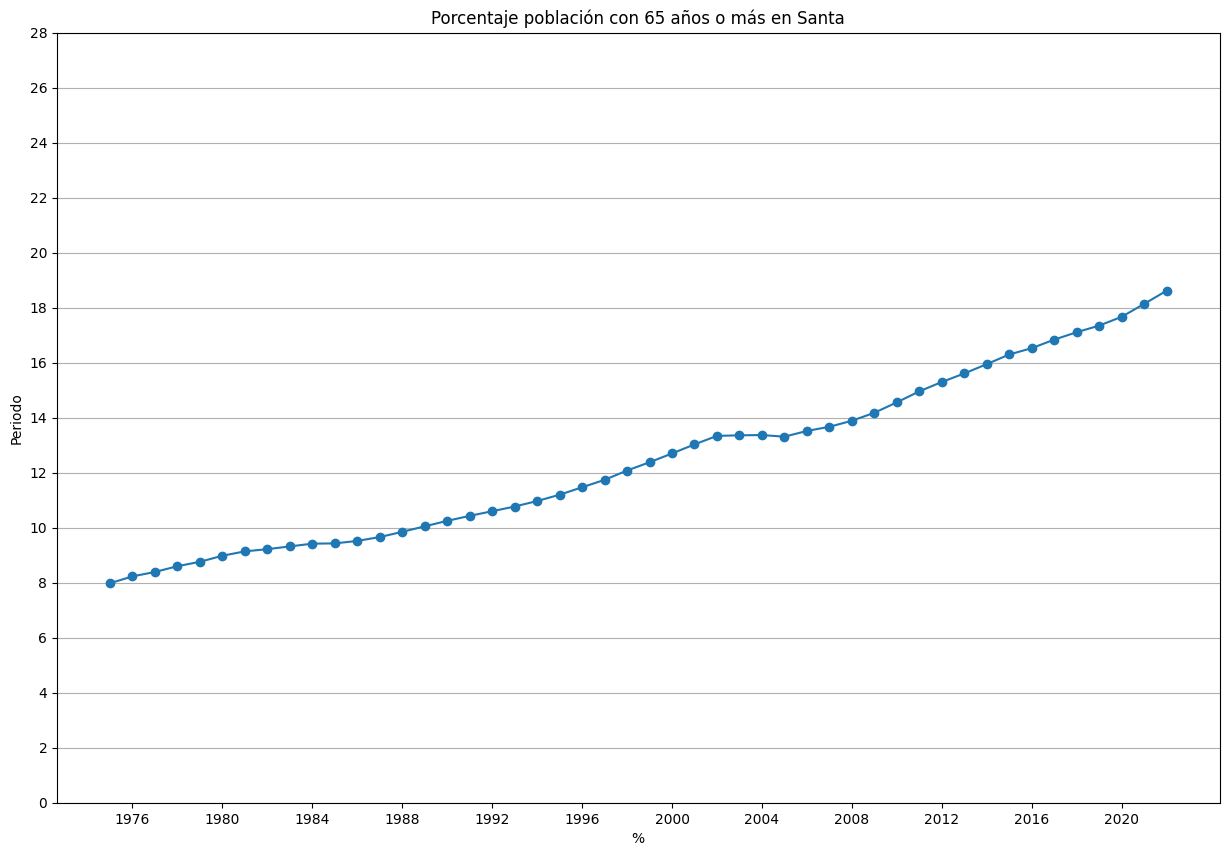

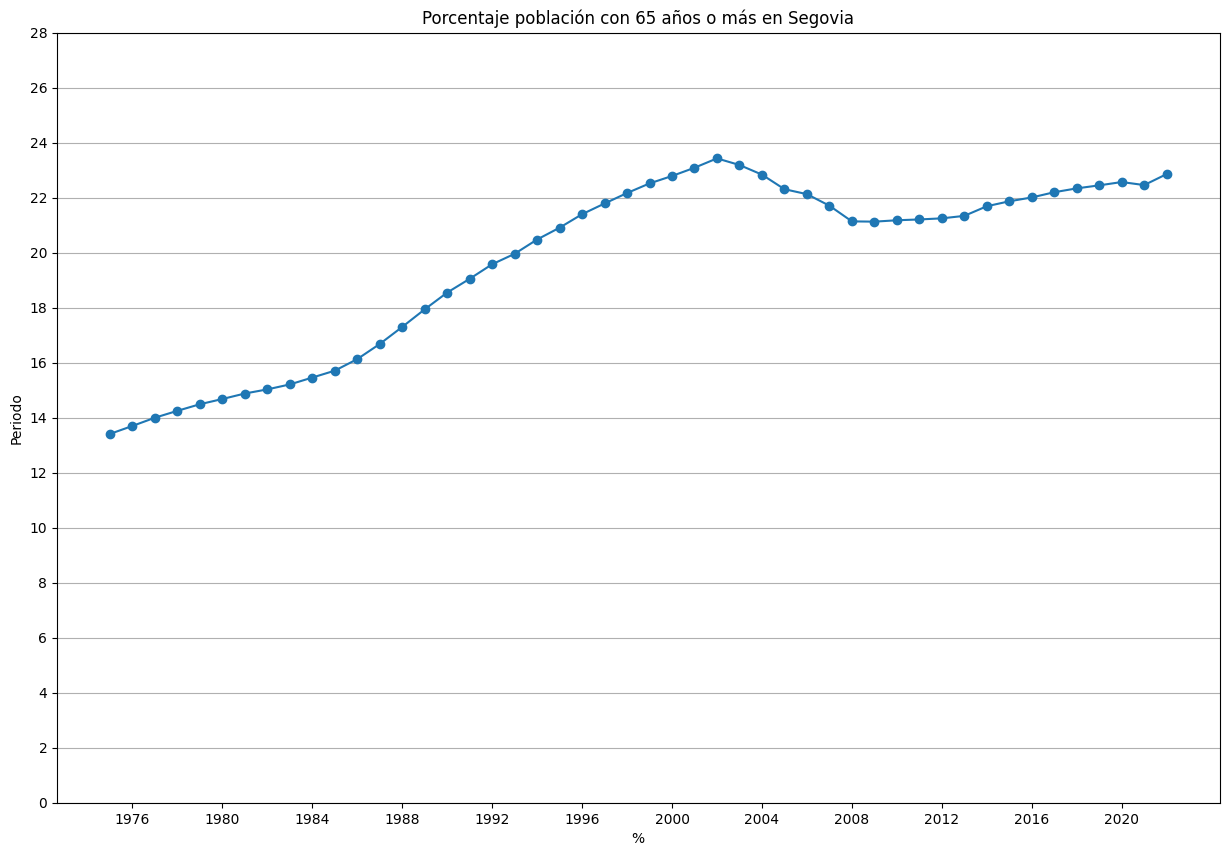

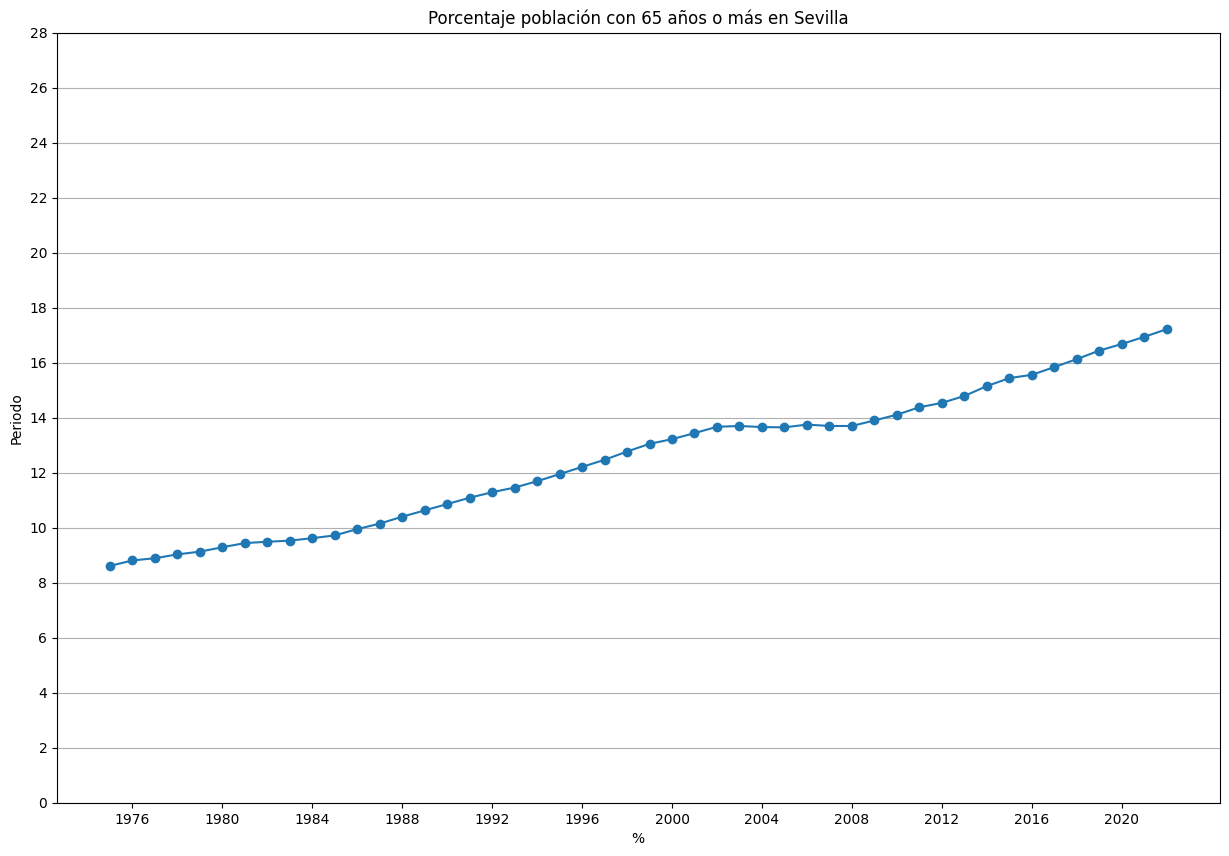

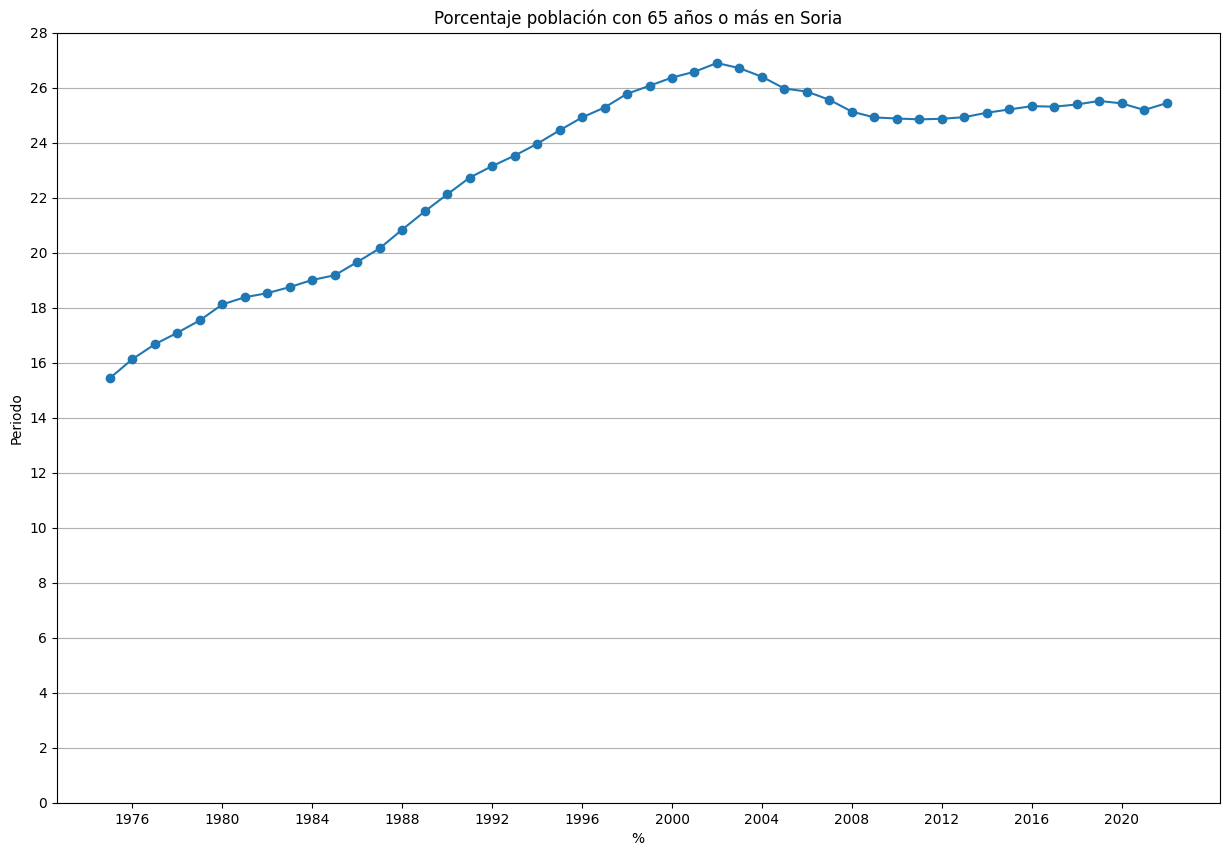

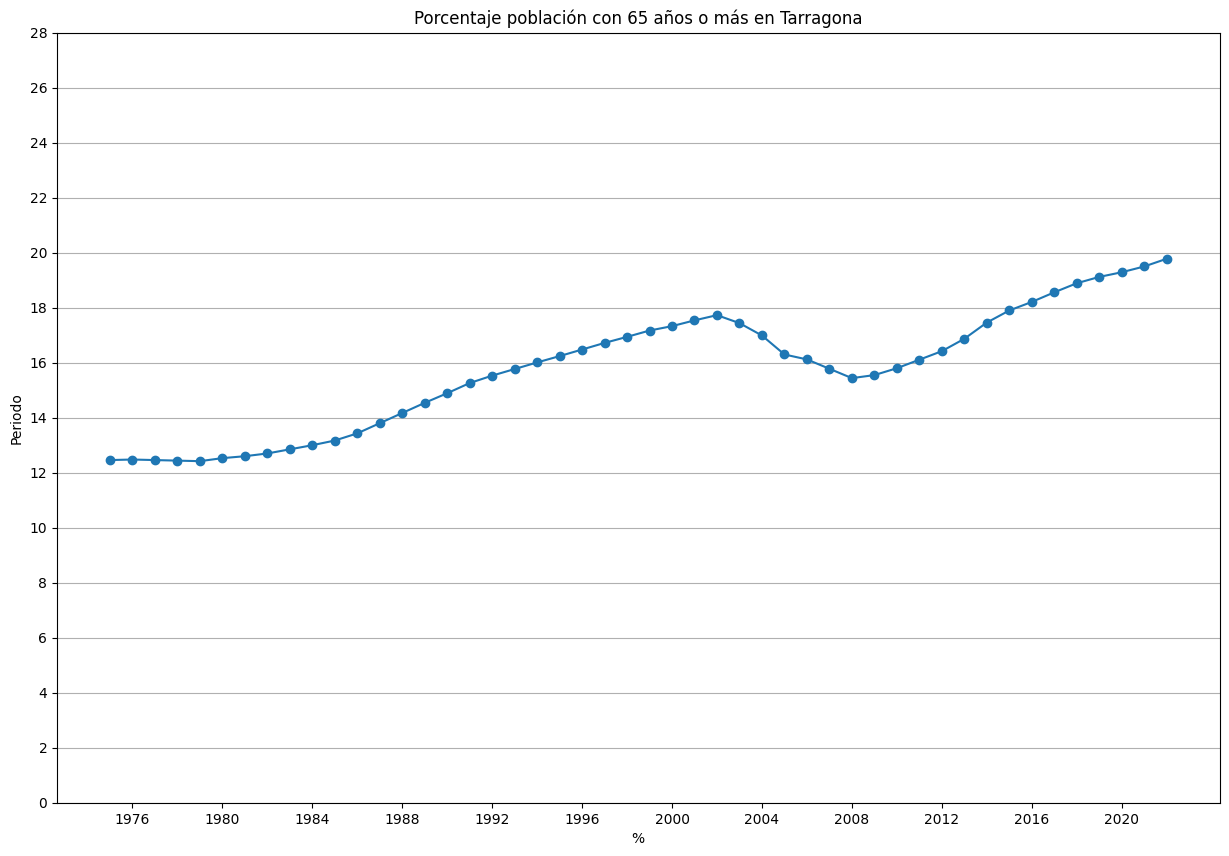

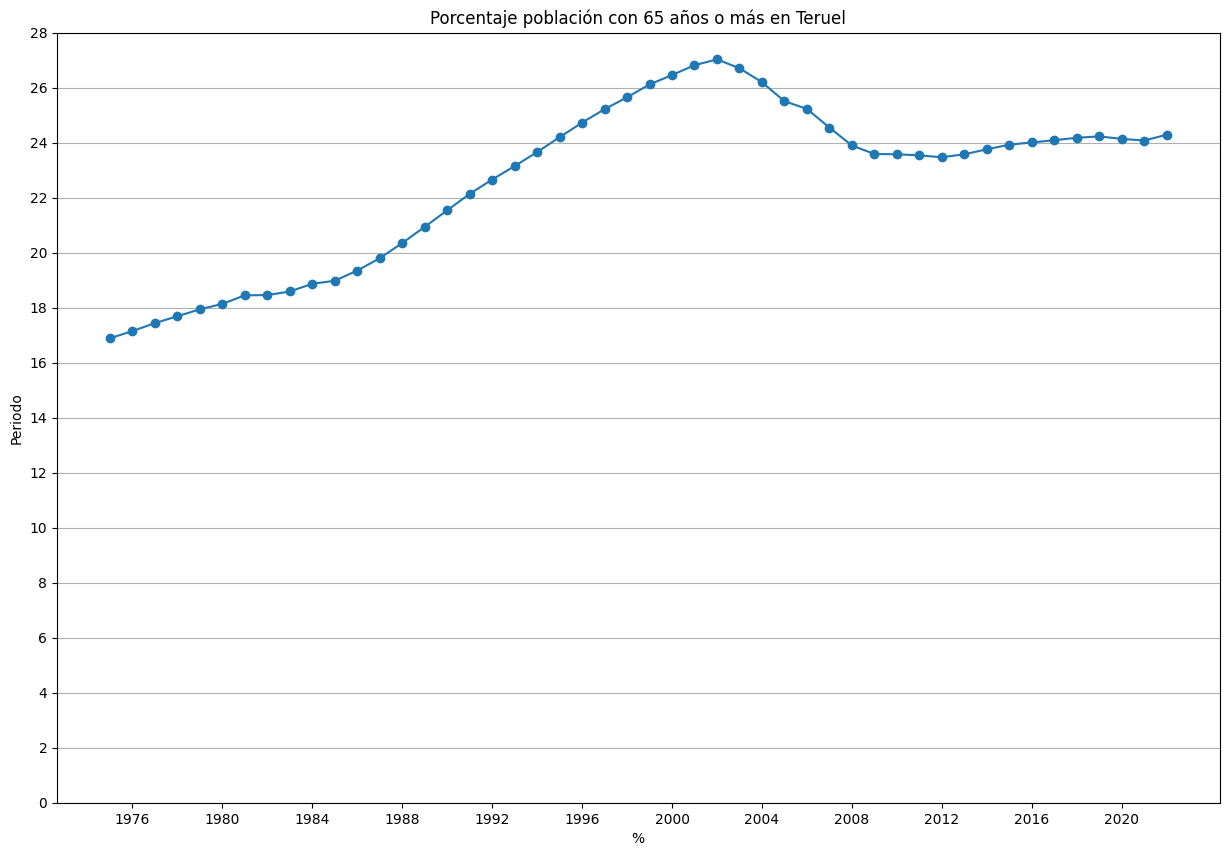

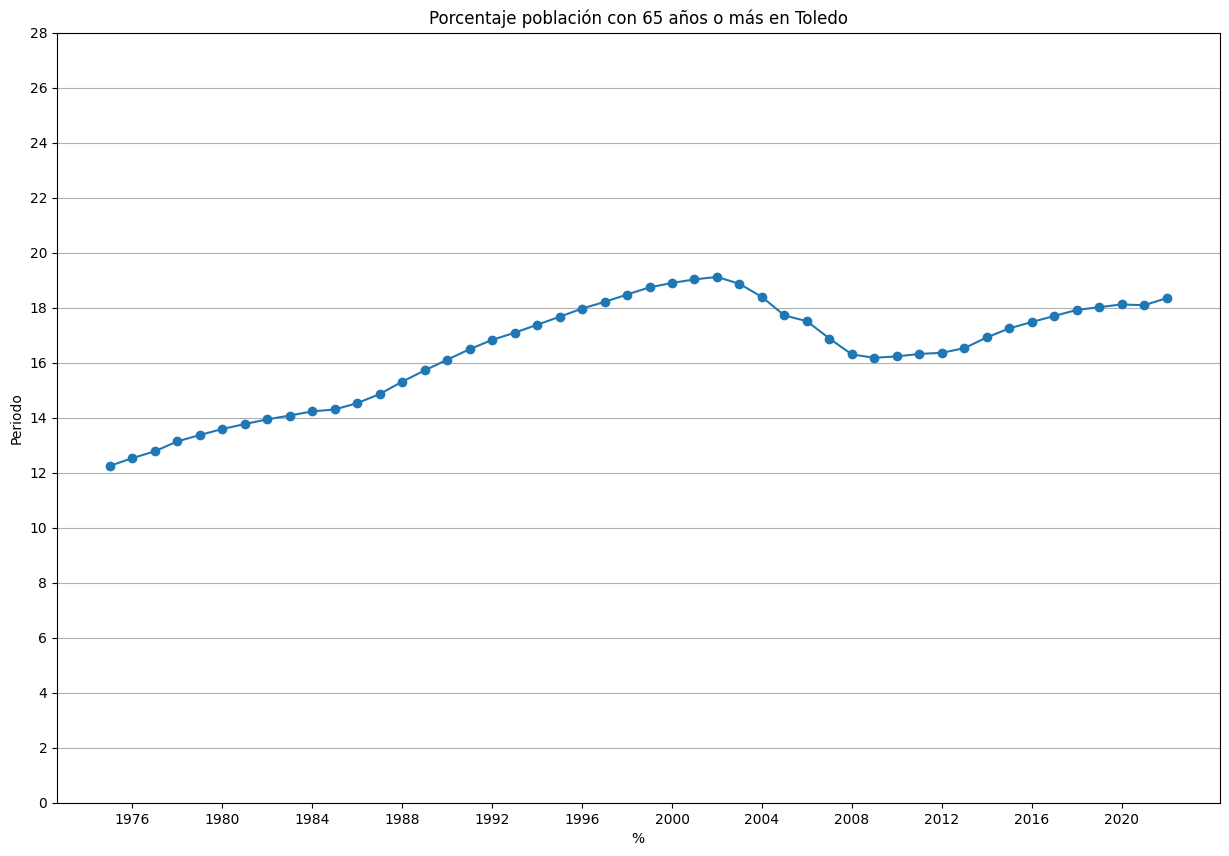

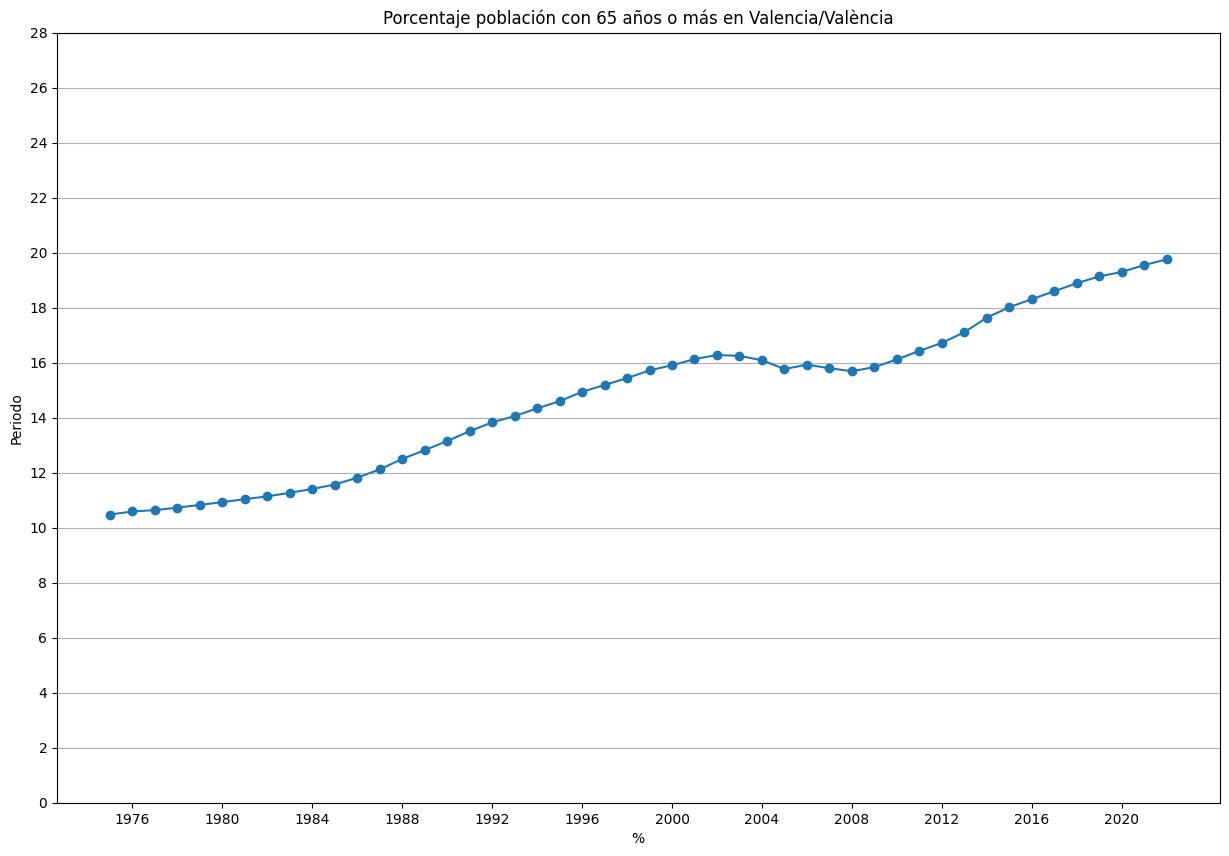

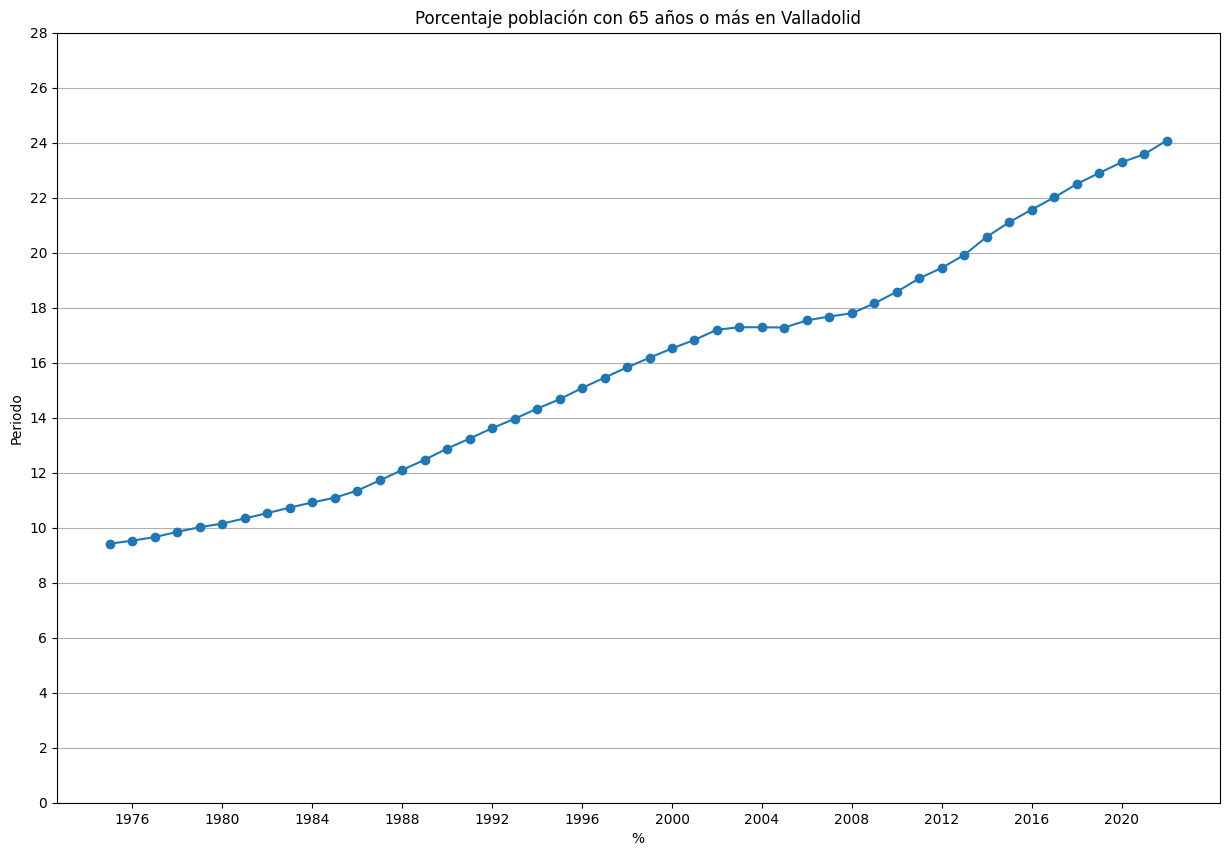

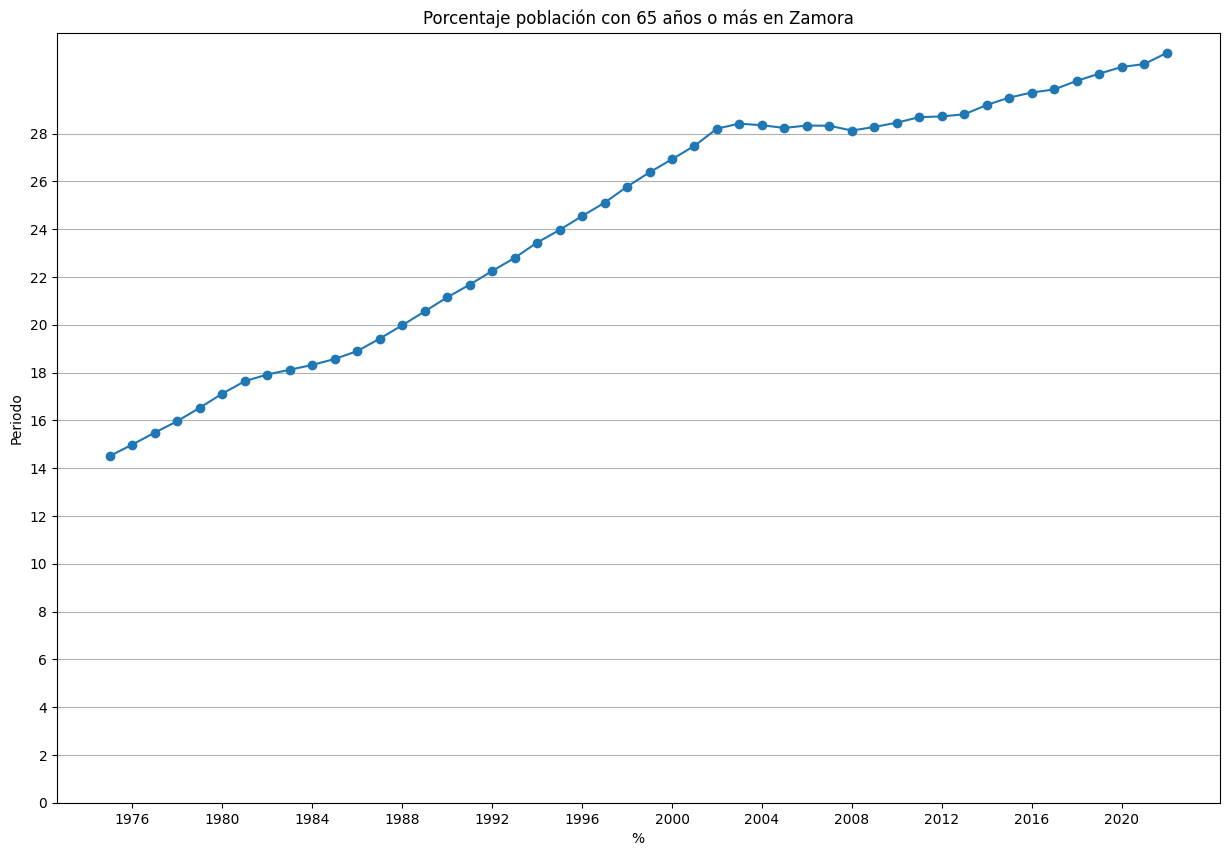

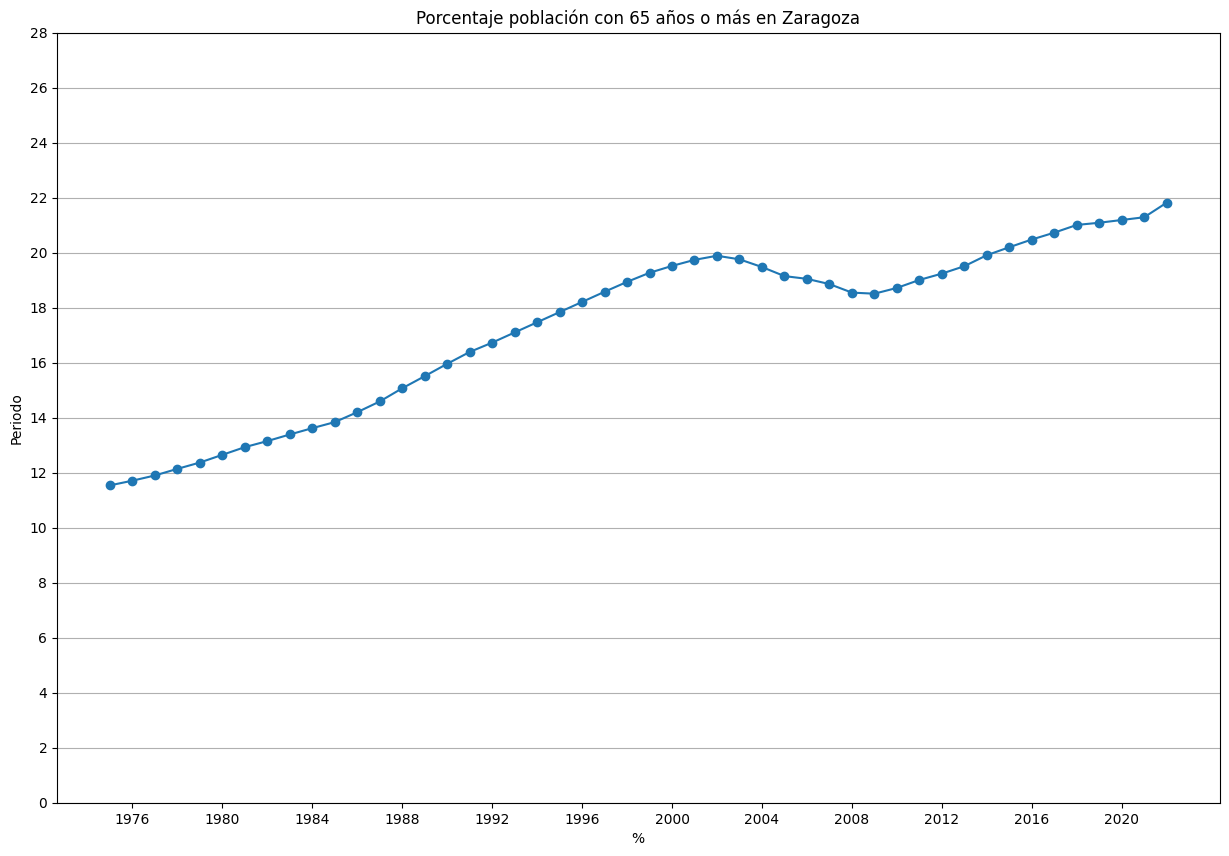

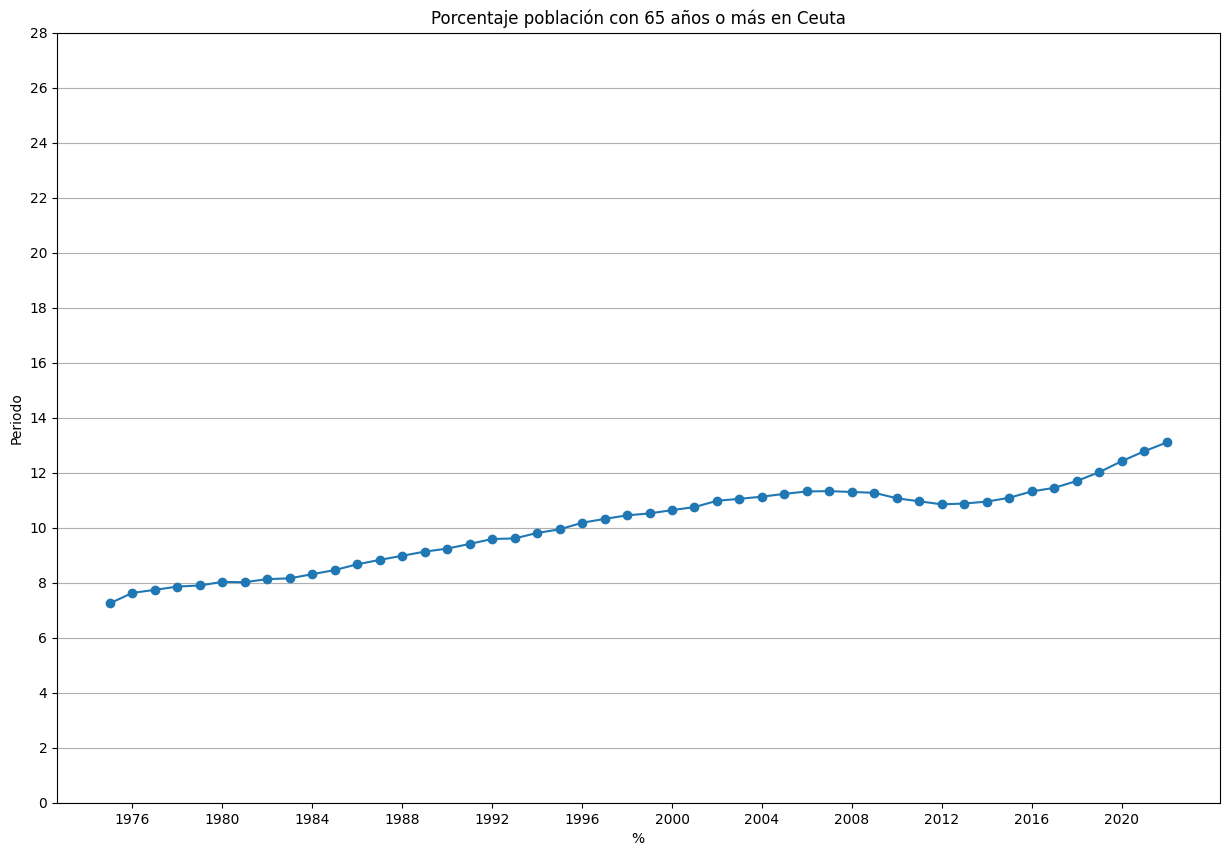

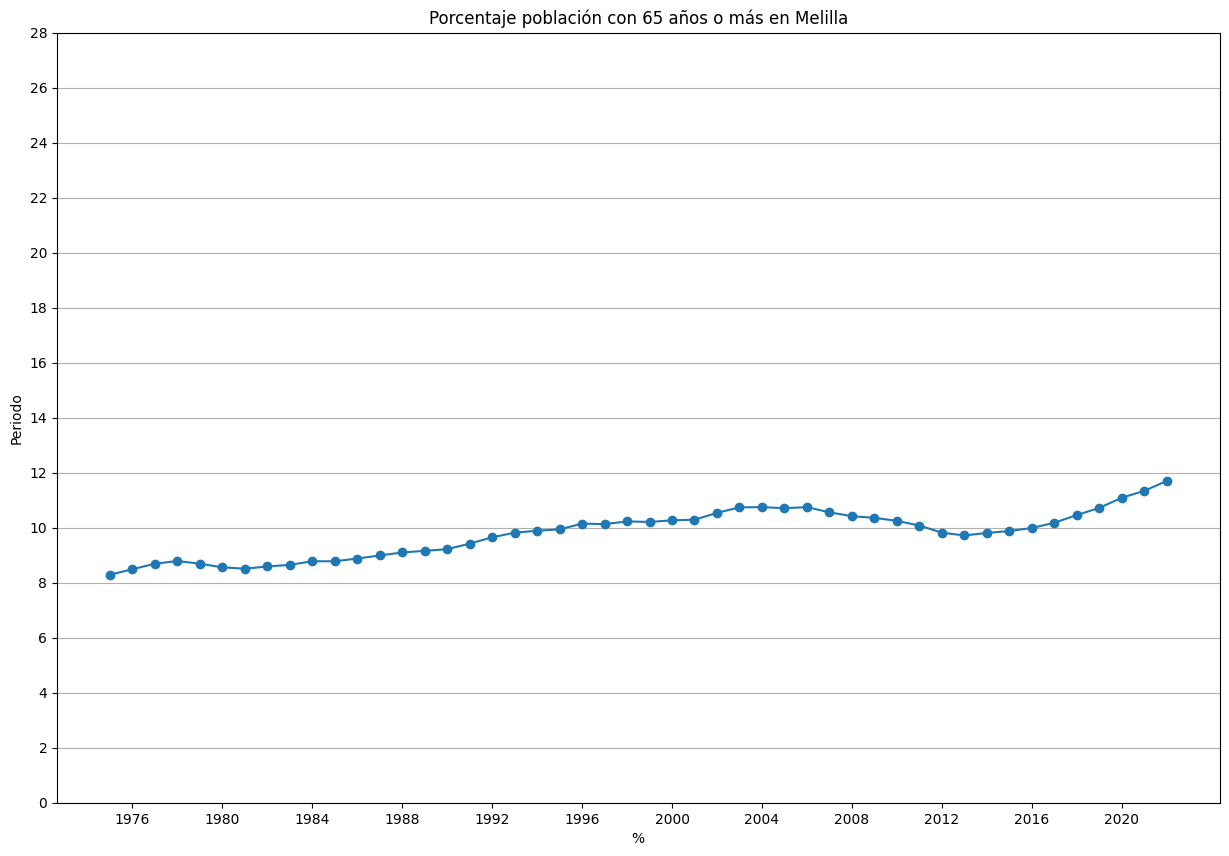

In [136]:
años = dataFramePobEdad_65mas_nacional['Periodo']

for prov in dataFramePobEdad_65mas_2022['Provincias']:
    seleccion = dataFramePobEdad_65mas[dataFramePobEdad['Provincias'] == prov]
    porcentaje = seleccion['Porcentaje']
    fig, ax = plt.subplots(figsize=(15,10))
    ax.plot(años,porcentaje,marker = "o")
    ax.set_title(f'Porcentaje población con 65 años o más en {prov.split()[1]}')
    ax.set_xlabel('%')
    ax.set_ylabel('Periodo')
    ax.grid(axis='y')
    plt.xticks(np.arange(1976,2023,4))
    plt.yticks(np.arange(0,30,2))
None